In [5]:
import garminconnect
from datetime import date
from getpass import getpass
import os

In [ ]:

def login_and_process_garth():
    # Prompt user for email and password
    email = input("Enter email address: ")
    password = getpass("Enter password: ")

    try:
        # Create a Garmin Connect instance and log in
        garmin = garminconnect.Garmin(email, password)
        garmin.login()

        # Retrieve the display name
        display_name = garmin.display_name
        print(f"Logged in as: {display_name}")

        # Retrieve the value of the GARTH_HOME environment variable
        GARTH_HOME = os.path.expanduser(os.getenv("GARTH_HOME", "~/.garth"))

        # Process the path using garmin.garth.dump
        garmin.garth.dump(GARTH_HOME)

        print(f"Data dumped to {GARTH_HOME}")
    except Exception as e:
        # Handle exceptions (e.g., login failure, network issues)
        print(f"An error occurred: {e}")

# Example usage
login_and_process_garth()


In [6]:
# retrieve the value of the GARTH_HOME environment variable 
# (defaulting to ~/.garth if not set) and then uses the 
# garmin.garth.dump function to process that path.

GARTH_HOME = os.getenv("GARTH_HOME", "~/.garth")
garmin.garth.dump(GARTH_HOME)

NameError: name 'garmin' is not defined

# Get Connect stats

In [7]:
from datetime import date, timedelta
import pandas as pd

# Define your target end date
end_date = date(2023, 10, 17)

# Calculate the start date as 2 weeks (14 days) before the end date
start_date = end_date - timedelta(days=14)

datelist = []

current_date = start_date
while current_date <= end_date:
    datelist.append(current_date)
    current_date += timedelta(days=1)

datelist_new = [x.isoformat() for x in datelist]

dataframes_list = []  # List to store each day's DataFrame

for day in datelist_new:
    current_entry = garmin.get_sleep_data(day)
    current_entry_df = pd.DataFrame([current_entry])  # Convert the dictionary to a DataFrame
    dataframes_list.append(current_entry_df)

# Concatenate all the DataFrames in the list
week_sleep_df = pd.concat(dataframes_list, ignore_index=True)

week_sleep_df




dailySleepDTO  \
0   {'id': None, 'userProfilePK': 116790140, 'cale...   
1   {'id': None, 'userProfilePK': 116790140, 'cale...   
2   {'id': None, 'userProfilePK': 116790140, 'cale...   
3   {'id': 1696542000000, 'userProfilePK': 1167901...   
4   {'id': 1696633620000, 'userProfilePK': 1167901...   
5   {'id': None, 'userProfilePK': 116790140, 'cale...   
6   {'id': None, 'userProfilePK': 116790140, 'cale...   
7   {'id': 1696886880000, 'userProfilePK': 1167901...   
8   {'id': 1696975260000, 'userProfilePK': 1167901...   
9   {'id': 1697062860000, 'userProfilePK': 1167901...   
10  {'id': 1697150400000, 'userProfilePK': 1167901...   
11  {'id': 1697238540000, 'userProfilePK': 1167901...   
12  {'id': 1697321760000, 'userProfilePK': 1167901...   
13  {'id': 1697410140000, 'userProfilePK': 1167901...   
14  {'id': 1697492100000, 'userProfilePK': 1167901...   

                                        sleepMovement remSleepData  \
0                                                  []         None   
1                                                  []         None   
2                                                  []         None   
3   [{'startGMT': '2023-10-05T20:40:00.0', 'endGMT...         True   
4   [{'startGMT': '2023-10-06T22:07:00.0', 'endGMT...         True   
5                                                  []         None   
6                                                  []         None   
7   [{'startGMT': '2023-10-09T20:28:00.0', 'endGMT...         True   
8   [{'startGMT': '2023-10-10T21:01:00.0', 'endGMT...         True   
9   [{'startGMT': '2023-10-11T21:21:00.0', 'endGMT...         True   
10  [{'startGMT': '2023-10-12T21:40:00.0', 'endGMT...         True   
11  [{'startGMT': '2023-10-13T22:09:00.0', 'endGMT...         True   
12  [{'startGMT': '2023-10-14T21:16:00.0', 'endGMT...         True   
13  [{'startGMT': '2023-10-15T21:49:00.0', 'endGMT...         True   
14  [{'startGMT': '2023-10-16T20:35:00.0', 'endGMT...         True   

                                          sleepLevels  \
0                                                  []   
1                                                  []   
2                                                  []   
3   [{'startGMT': '2023-10-05T21:40:00.0', 'endGMT...   
4   [{'startGMT': '2023-10-06T23:07:00.0', 'endGMT...   
5                                                  []   
6                                                  []   
7   [{'startGMT': '2023-10-09T21:28:00.0', 'endGMT...   
8   [{'startGMT': '2023-10-10T22:01:00.0', 'endGMT...   
9   [{'startGMT': '2023-10-11T22:21:00.0', 'endGMT...   
10  [{'startGMT': '2023-10-12T22:40:00.0', 'endGMT...   
11  [{'startGMT': '2023-10-13T23:09:00.0', 'endGMT...   
12  [{'startGMT': '2023-10-14T22:16:00.0', 'endGMT...   
13  [{'startGMT': '2023-10-15T22:49:00.0', 'endGMT...   
14  [{'startGMT': '2023-10-16T21:35:00.0', 'endGMT...   

                                 sleepRestlessMoments  restlessMomentsCount  \
0                                                 NaN                   NaN   
1                                                 NaN                   NaN   
2                                                 NaN                   NaN   
3   [{'value': 1, 'startGMT': 1696542180000}, {'va...                  30.0   
4   [{'value': 1, 'startGMT': 1696633620000}, {'va...                  24.0   
5                                                 NaN                   NaN   
6                                                 NaN                   NaN   
7   [{'value': 1, 'startGMT': 1696887600000}, {'va...                  16.0   
8   [{'value': 1, 'startGMT': 1696977060000}, {'va...                  22.0   
9   [{'value': 1, 'startGMT': 1697065920000}, {'va...                  11.0   
10  [{'value': 1, 'startGMT': 1697154540000}, {'va...                  16.0   
11  [{'value': 2, 'startGMT': 1697239080000}, {'va...                  34.0   
12  [{'value': 1, 'startGMT': 1697322480000}, {'va...             

In [8]:
week_sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   dailySleepDTO                        15 non-null     object 
 1   sleepMovement                        15 non-null     object 
 2   remSleepData                         10 non-null     object 
 3   sleepLevels                          15 non-null     object 
 4   sleepRestlessMoments                 10 non-null     object 
 5   restlessMomentsCount                 10 non-null     float64
 6   wellnessEpochRespirationDataDTOList  10 non-null     object 
 7   sleepHeartRate                       10 non-null     object 
 8   sleepStress                          10 non-null     object 
 9   sleepBodyBattery                     10 non-null     object 
 10  hrvData                              10 non-null     object 
 11  avgOvernightHrv                   

In [9]:
garmin.get_sleep_data(day)

{'dailySleepDTO': {'id': 1697492100000,
  'userProfilePK': 116790140,
  'calendarDate': '2023-10-17',
  'sleepTimeSeconds': 27840,
  'napTimeSeconds': 0,
  'sleepWindowConfirmed': True,
  'sleepWindowConfirmationType': 'enhanced_confirmed_final',
  'sleepStartTimestampGMT': 1697492100000,
  'sleepEndTimestampGMT': 1697520060000,
  'sleepStartTimestampLocal': 1697499300000,
  'sleepEndTimestampLocal': 1697527260000,
  'autoSleepStartTimestampGMT': None,
  'autoSleepEndTimestampGMT': None,
  'sleepQualityTypePK': None,
  'sleepResultTypePK': None,
  'unmeasurableSleepSeconds': 0,
  'deepSleepSeconds': 5520,
  'lightSleepSeconds': 14940,
  'remSleepSeconds': 7380,
  'awakeSleepSeconds': 120,
  'deviceRemCapable': True,
  'retro': False,
  'sleepFromDevice': True,
  'averageRespirationValue': 15.0,
  'lowestRespirationValue': 12.0,
  'highestRespirationValue': 20.0,
  'awakeCount': 0,
  'avgSleepStress': 11.0,
  'ageGroup': 'ADULT',
  'sleepScoreFeedback': 'POSITIVE_OPTIMAL_STRUCTURE',
  '

In [10]:
week_sleep_df.columns

Index(['dailySleepDTO', 'sleepMovement', 'remSleepData', 'sleepLevels',
       'sleepRestlessMoments', 'restlessMomentsCount',
       'wellnessEpochRespirationDataDTOList', 'sleepHeartRate', 'sleepStress',
       'sleepBodyBattery', 'hrvData', 'avgOvernightHrv', 'hrvStatus',
       'restingHeartRate'],
      dtype='object')

# Exploring the columns

In [11]:
expanded_df = pd.json_normalize(week_sleep_df['dailySleepDTO'])

# If you want to remove the "dailySleepDTO." prefix from the column names:
expanded_df.columns = [col.replace('dailySleepDTO.', '') for col in expanded_df.columns]

expanded_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
0            NaN      116790140   2023-10-03               NaN   
1            NaN      116790140   2023-10-04               NaN   
2            NaN      116790140   2023-10-05               NaN   
3   1.696542e+12      116790140   2023-10-06           28714.0   
4   1.696634e+12      116790140   2023-10-07           29340.0   
5            NaN      116790140   2023-10-08               NaN   
6            NaN      116790140   2023-10-09               NaN   
7   1.696887e+12      116790140   2023-10-10           19800.0   
8   1.696975e+12      116790140   2023-10-11           33660.0   
9   1.697063e+12      116790140   2023-10-12           17460.0   
10  1.697150e+12      116790140   2023-10-13           21180.0   
11  1.697239e+12      116790140   2023-10-14           32520.0   
12  1.697322e+12      116790140   2023-10-15           39600.0   
13  1.697410e+12      116790140   2023-10-16           22260.0   
14  1.697492e+12      116790140   2023-10-17           27840.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
0              NaN                 None                        None   
1              NaN                 None                        None   
2              NaN                 None                        None   
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
5              NaN                 None                        None   
6              NaN                 None                        None   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
0                      NaN                   NaN                       NaN   
1                      NaN                   NaN                       NaN   
2                      NaN                   NaN                       NaN   
3             1.696542e+12          1.696571e+12              1.696549e+12   
4             1.696634e+12          1.696663e+12              1.696641e+12   
5                      NaN                   NaN                       NaN   
6                      NaN                   NaN                       NaN   
7             1.696887e+12          1.696907e+12              1.696894e+12   
8             1.696975e+12          1.697010e+12              1.696982e+12   
9             1.697063e+12          1.697080e+12              1.697070e+12   
10            1.697150e+12          1.697172e+12              1.697158e+12   
11            1.697239e+12          1.697271e+12              1.697246e+12   
12            1.697322e+12          1.697363e+12              1.697329e+12   
13            1.697410e+12          1.697433e+12              1.697417e+12   
14            1.697492e+12          1.697520e+12              1.697499e+12   

    ...  sleepScores.lightPercentage.optimalEnd  \
0   ...                                     NaN   
1   ...                                     NaN   
2   ...                                     NaN   
3   ...                                    64.0   
4   ...                                    64.0   
5   ...                                     NaN   
6   ...                                     NaN   
7   ...                                    64.0   
8   ...                                    64.0   
9   ...                                    64.0   
10  ...   

In [12]:
expanded_df["awakeSleepSeconds"]

0        NaN
1        NaN
2        NaN
3      360.0
4        0.0
5        NaN
6        NaN
7      180.0
8      660.0
9        0.0
10     420.0
11       0.0
12    1500.0
13     420.0
14     120.0
Name: awakeSleepSeconds, dtype: float64

In [13]:
a = pd.DataFrame.from_dict(week_sleep_df["sleepHeartRate"]).dropna(axis=0)
dfs = [pd.DataFrame(lst) for lst in a['sleepHeartRate'] if lst]

# Concatenate all the DataFrames to form the final DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Optionally, set "value" and "startGMT" as the index
final_df

value       startGMT
0      72.0  1696542000000
1      72.0  1696542120000
2      74.0  1696542240000
3      70.0  1696542360000
4      69.0  1696542480000
...     ...            ...
2217   67.0  1697519520000
2218   73.0  1697519640000
2219   68.0  1697519760000
2220   68.0  1697519880000
2221   66.0  1697520000000

[2222 rows x 2 columns]

In [14]:
final_df["startGMT"] = pd.to_datetime(final_df["startGMT"], unit='ms')

final_df["startGMT"]

0      2023-10-05 21:40:00
1      2023-10-05 21:42:00
2      2023-10-05 21:44:00
3      2023-10-05 21:46:00
4      2023-10-05 21:48:00
               ...        
2217   2023-10-17 05:12:00
2218   2023-10-17 05:14:00
2219   2023-10-17 05:16:00
2220   2023-10-17 05:18:00
2221   2023-10-17 05:20:00
Name: startGMT, Length: 2222, dtype: datetime64[ns]

In [15]:
final_df

value            startGMT
0      72.0 2023-10-05 21:40:00
1      72.0 2023-10-05 21:42:00
2      74.0 2023-10-05 21:44:00
3      70.0 2023-10-05 21:46:00
4      69.0 2023-10-05 21:48:00
...     ...                 ...
2217   67.0 2023-10-17 05:12:00
2218   73.0 2023-10-17 05:14:00
2219   68.0 2023-10-17 05:16:00
2220   68.0 2023-10-17 05:18:00
2221   66.0 2023-10-17 05:20:00

[2222 rows x 2 columns]

In [16]:
from datetime import timedelta

# Convert GMT to local time by adding 2 hours
final_df["startLocal"] = final_df["startGMT"] + timedelta(hours=2)

# Display the converted times
final_df


value            startGMT          startLocal
0      72.0 2023-10-05 21:40:00 2023-10-05 23:40:00
1      72.0 2023-10-05 21:42:00 2023-10-05 23:42:00
2      74.0 2023-10-05 21:44:00 2023-10-05 23:44:00
3      70.0 2023-10-05 21:46:00 2023-10-05 23:46:00
4      69.0 2023-10-05 21:48:00 2023-10-05 23:48:00
...     ...                 ...                 ...
2217   67.0 2023-10-17 05:12:00 2023-10-17 07:12:00
2218   73.0 2023-10-17 05:14:00 2023-10-17 07:14:00
2219   68.0 2023-10-17 05:16:00 2023-10-17 07:16:00
2220   68.0 2023-10-17 05:18:00 2023-10-17 07:18:00
2221   66.0 2023-10-17 05:20:00 2023-10-17 07:20:00

[2222 rows x 3 columns]

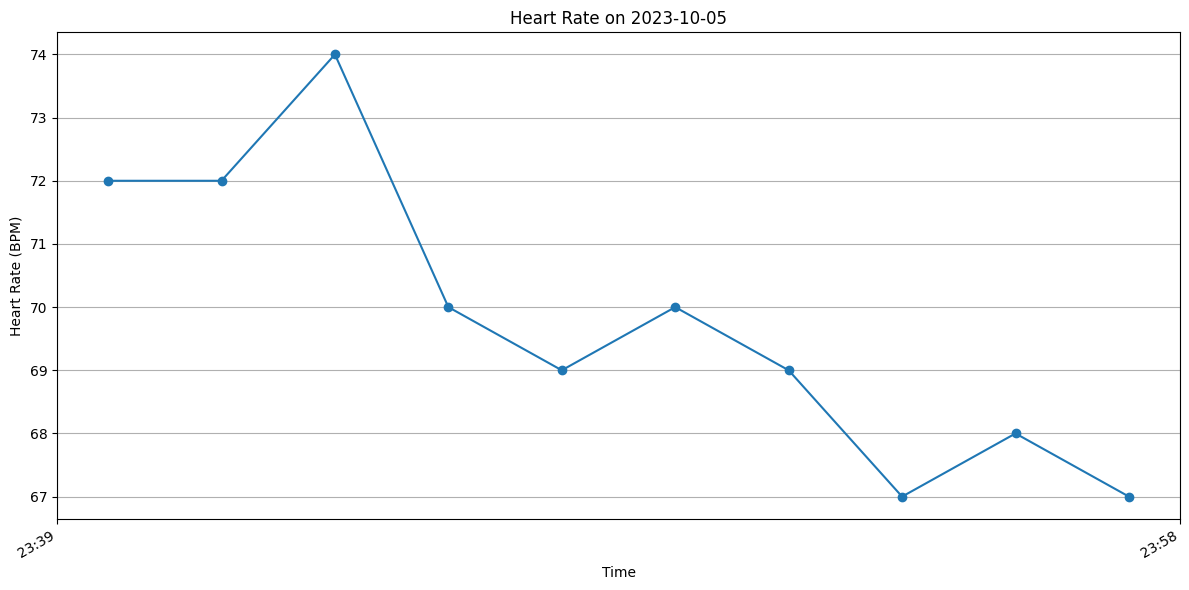

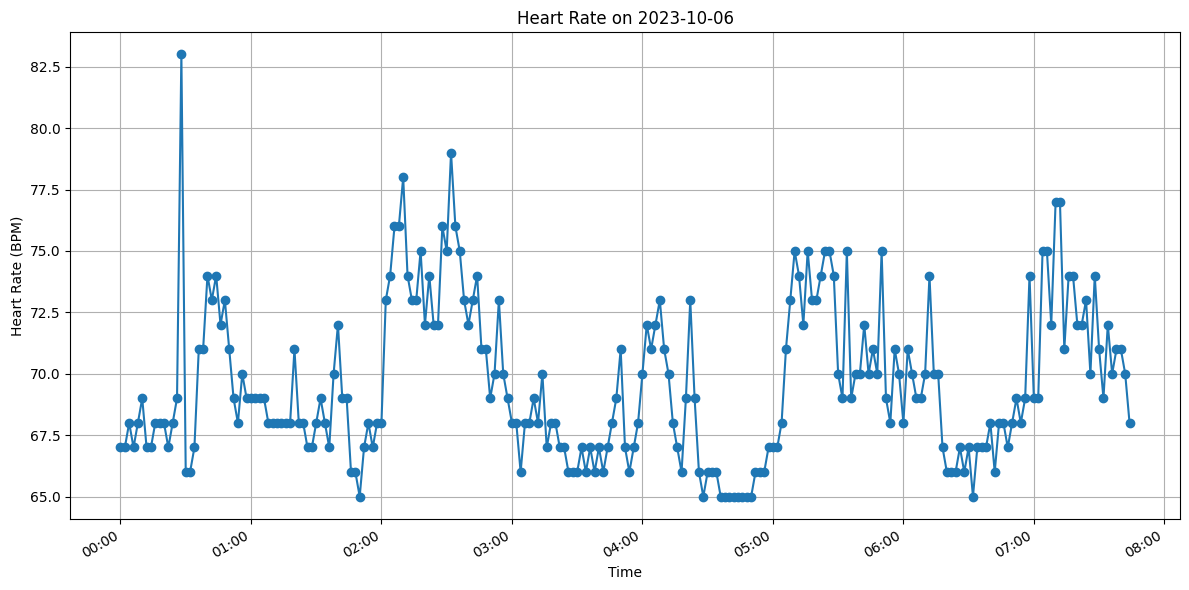

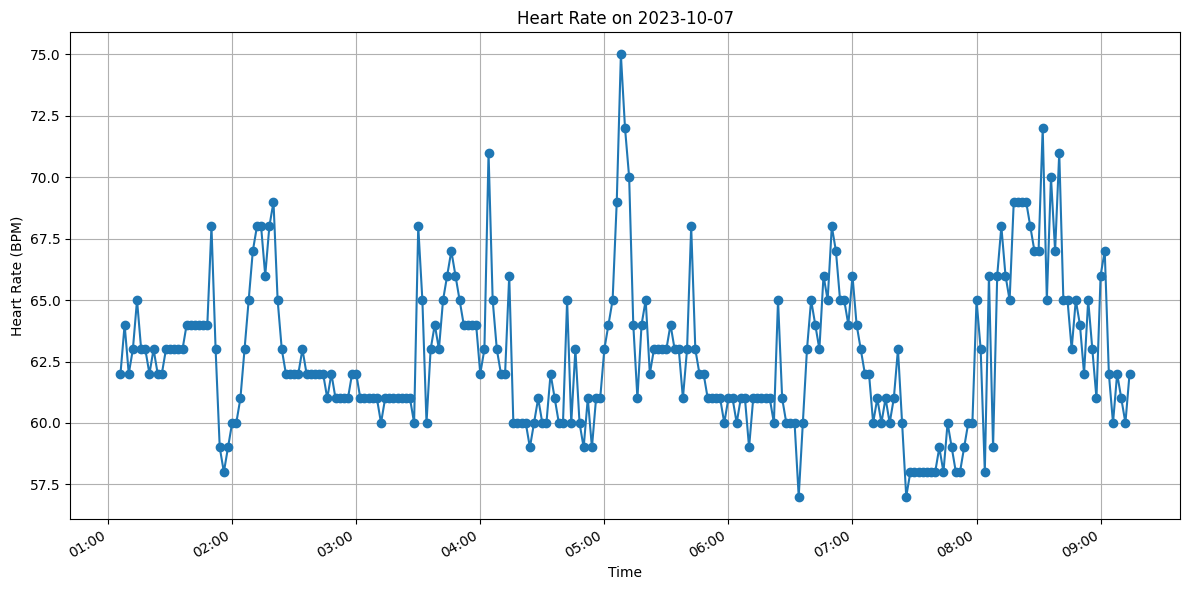

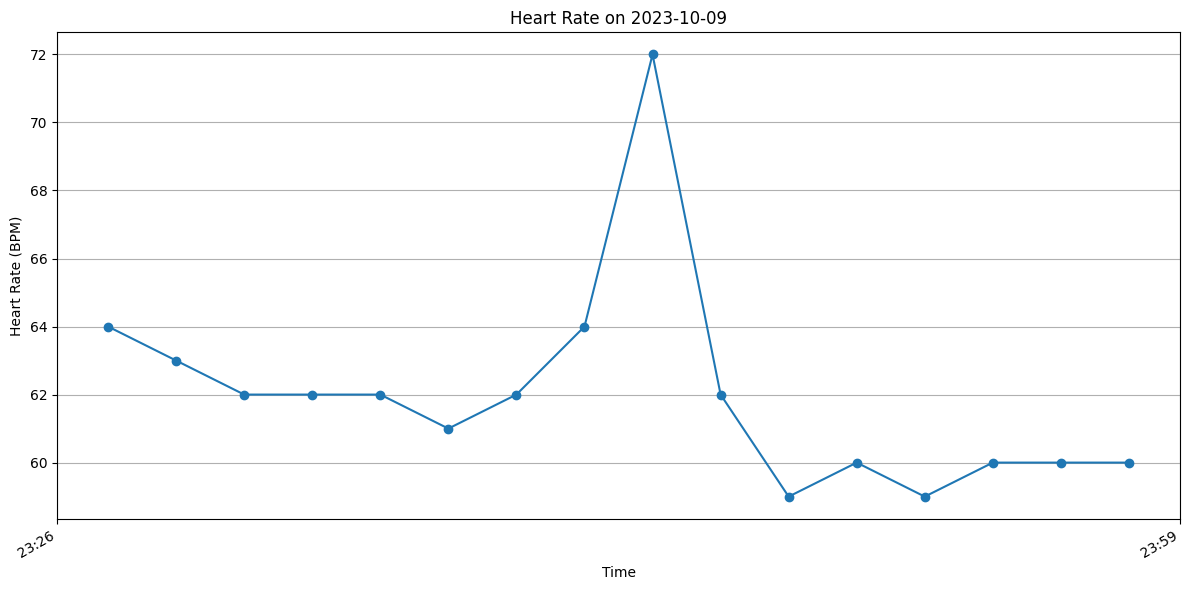

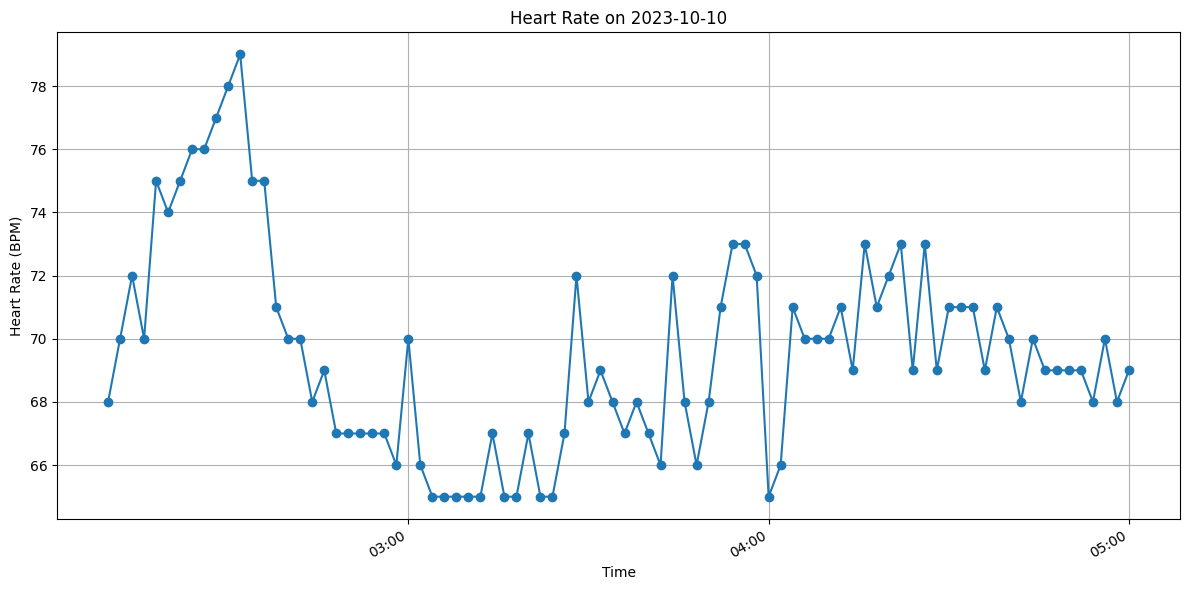

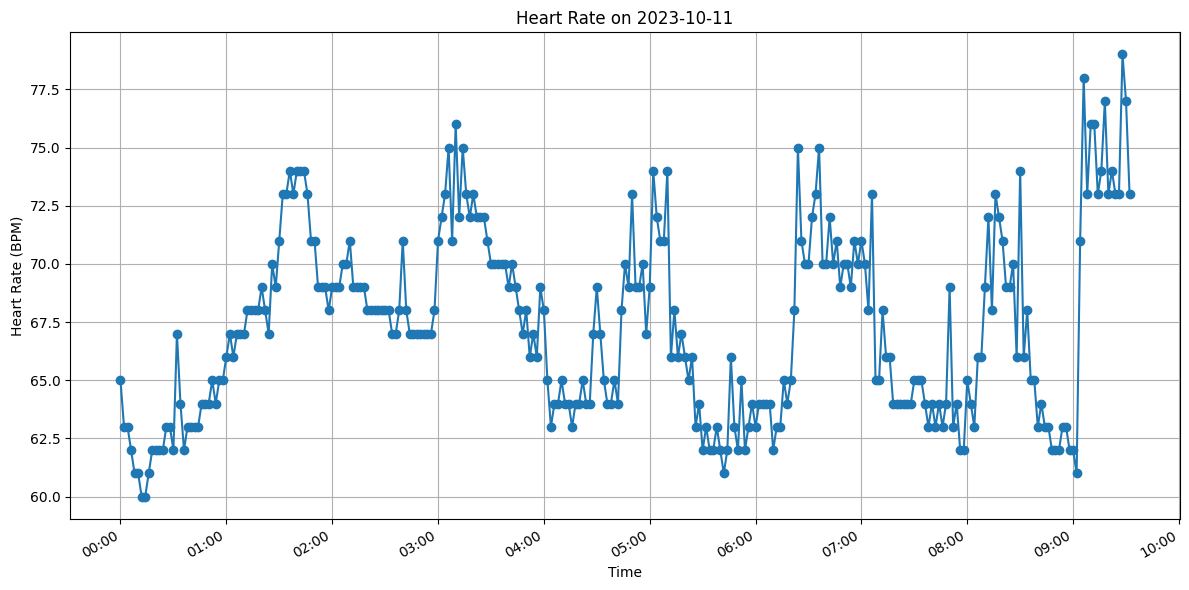

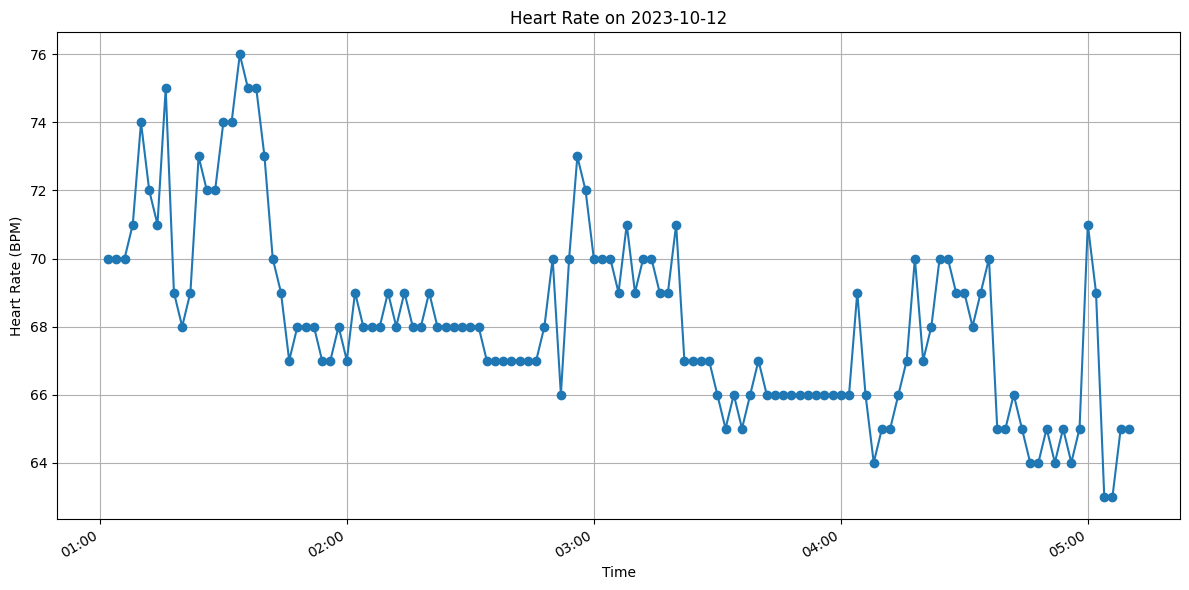

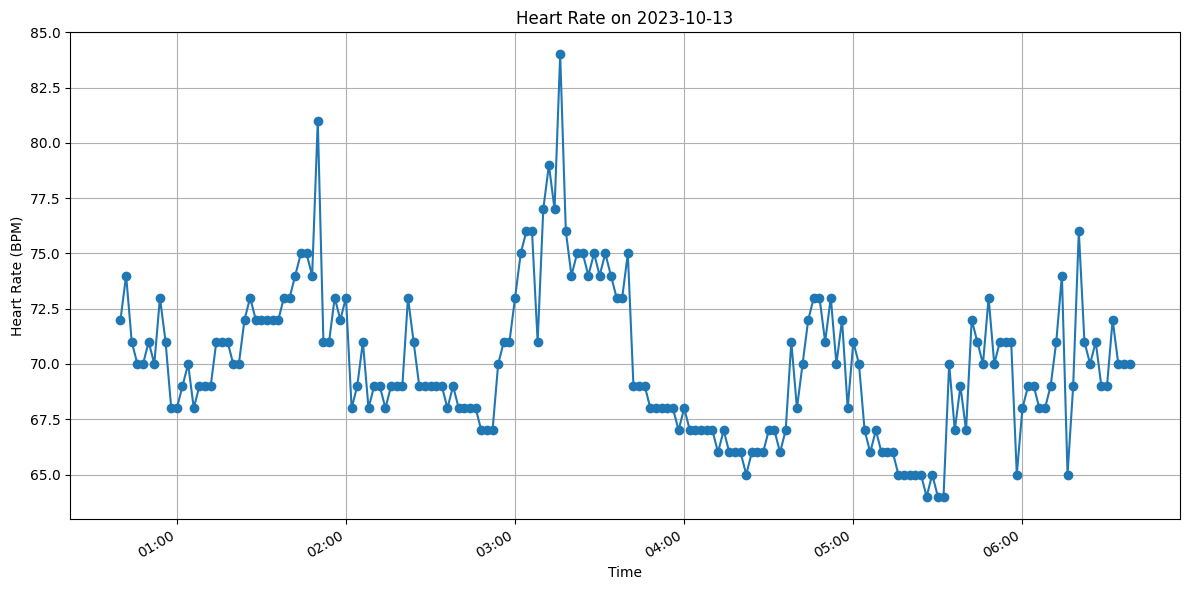

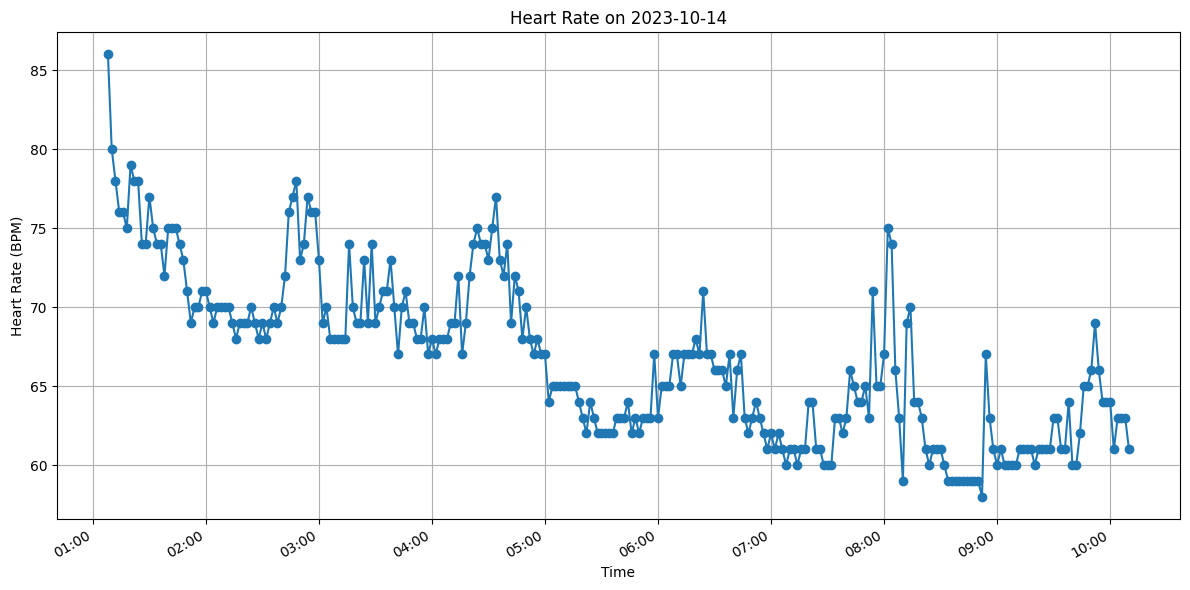

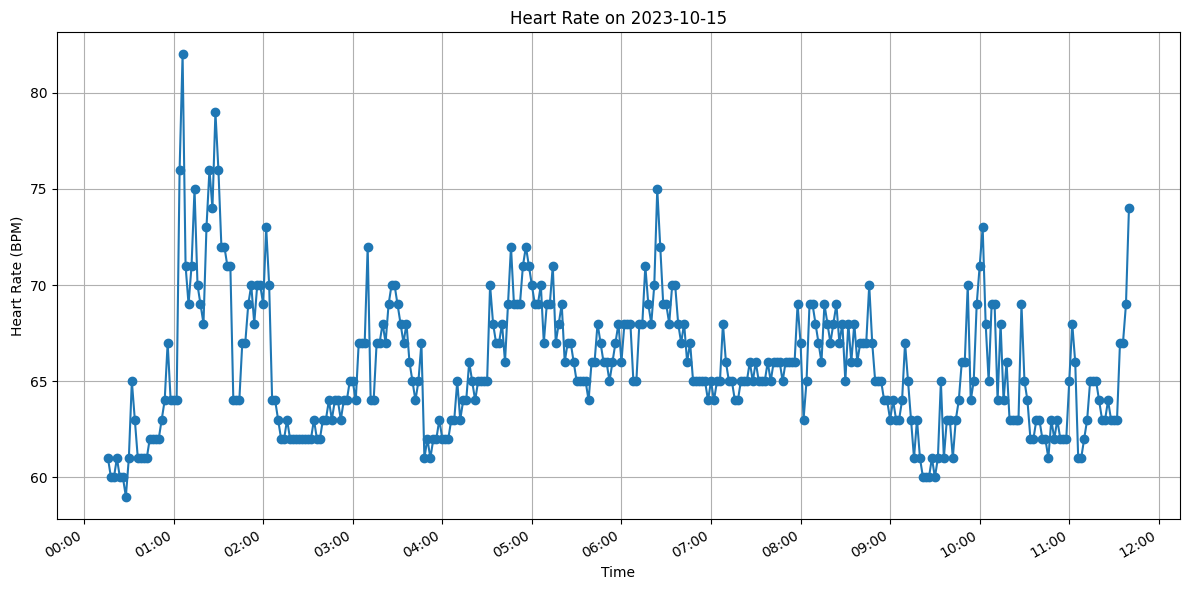

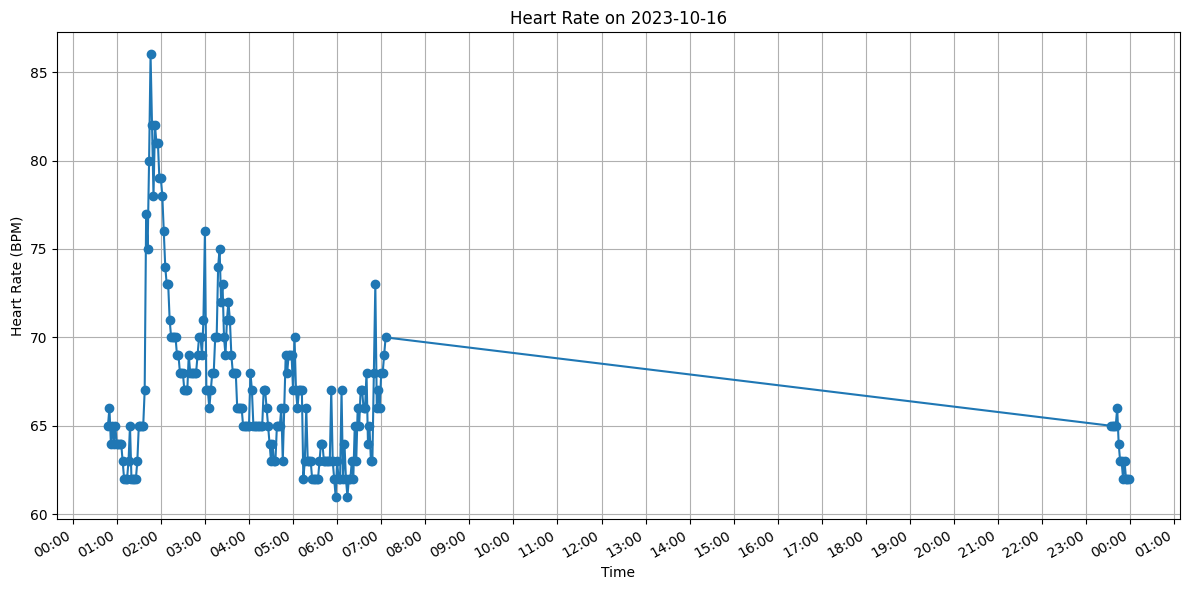

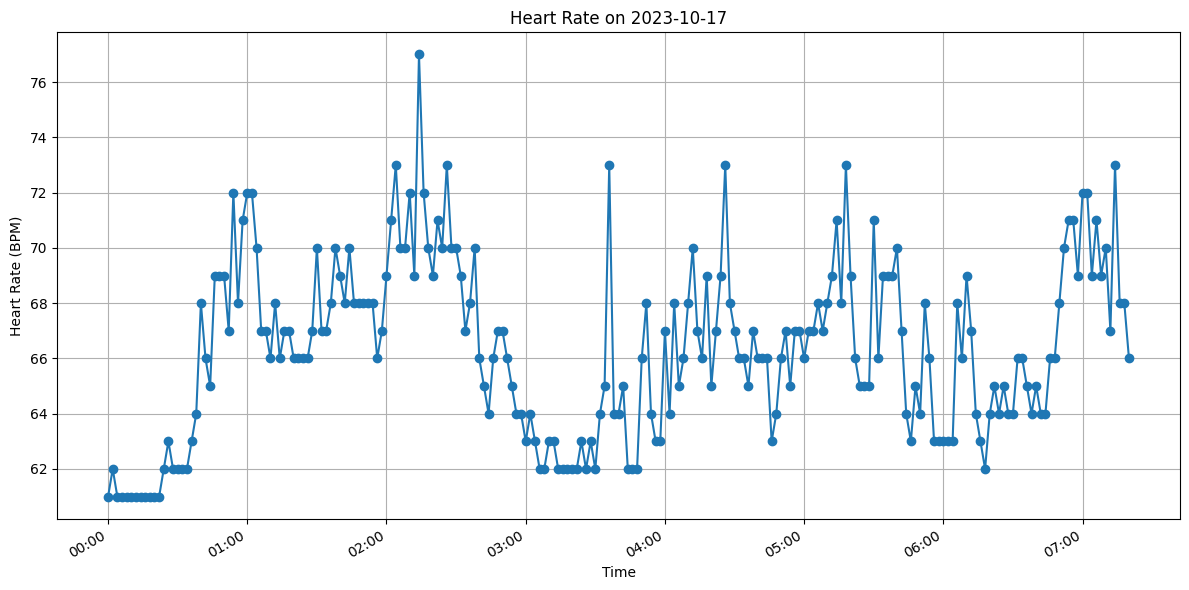

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract the unique days in the startGMT column
unique_days = final_df['startLocal'].dt.date.unique()

# Loop through each unique day
for day in unique_days:
    # Filter data for the current day
    day_data = final_df[final_df['startLocal'].dt.date == day]
    
    # Plotting the DataFrame for the current day
    plt.figure(figsize=(12, 6))
    plt.plot(day_data['startLocal'], day_data['value'], marker='o', linestyle='-')
    
    # Formatting the x-axis for better visualization
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gcf().autofmt_xdate()

    # Setting title and labels
    plt.title(f'Heart Rate on {day}')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (BPM)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
expanded_df["sleepEndTimestampLocal"] = pd.to_datetime(expanded_df["sleepEndTimestampLocal"], unit='ms')

expanded_df["sleepEndTimestampLocal"]

0                    NaT
1                    NaT
2                    NaT
3    2023-10-06 07:44:34
4    2023-10-07 09:16:00
5                    NaT
6                    NaT
7    2023-10-10 05:01:00
8    2023-10-11 09:33:00
9    2023-10-12 05:12:00
10   2023-10-13 06:40:00
11   2023-10-14 10:11:00
12   2023-10-15 11:41:00
13   2023-10-16 07:07:00
14   2023-10-17 07:21:00
Name: sleepEndTimestampLocal, dtype: datetime64[ns]

In [19]:
expanded_df["sleepStartTimestampLocal"] = pd.to_datetime(expanded_df["sleepStartTimestampLocal"], unit='ms')

expanded_df["sleepStartTimestampLocal"]

0                    NaT
1                    NaT
2                    NaT
3    2023-10-05 23:40:00
4    2023-10-07 01:07:00
5                    NaT
6                    NaT
7    2023-10-09 23:28:00
8    2023-10-11 00:01:00
9    2023-10-12 00:21:00
10   2023-10-13 00:40:00
11   2023-10-14 01:09:00
12   2023-10-15 00:16:00
13   2023-10-16 00:49:00
14   2023-10-16 23:35:00
Name: sleepStartTimestampLocal, dtype: datetime64[ns]

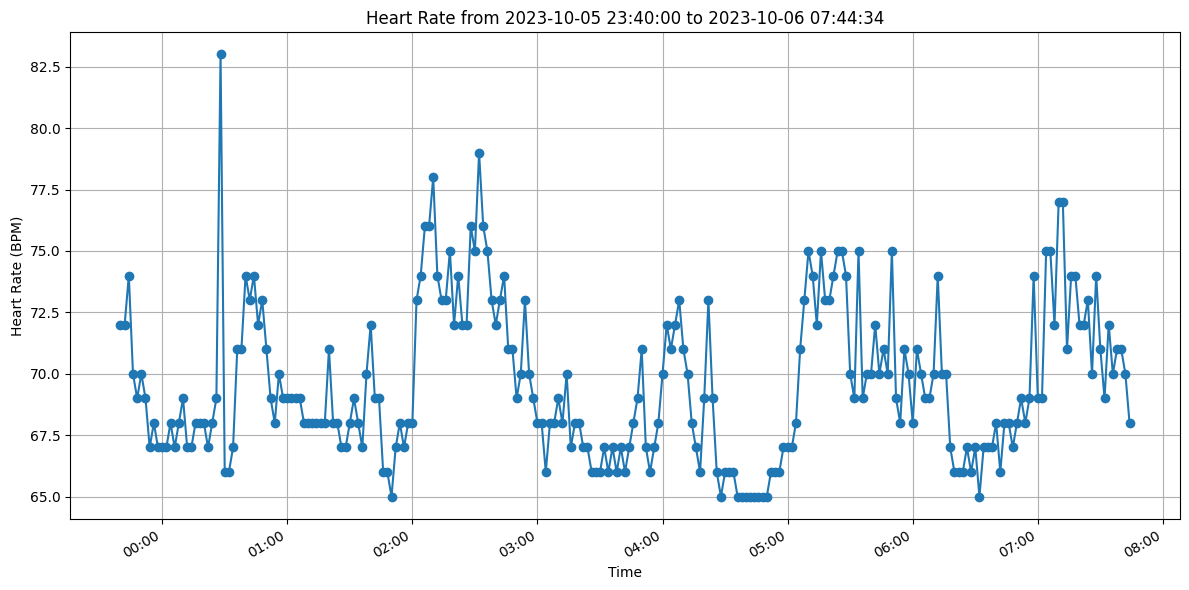

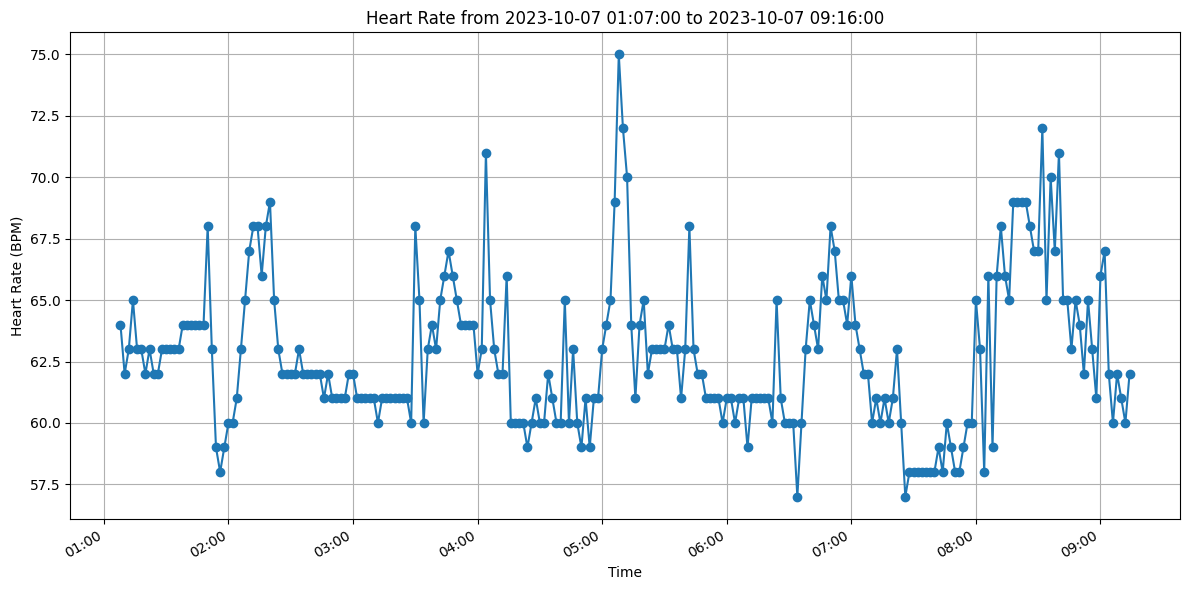

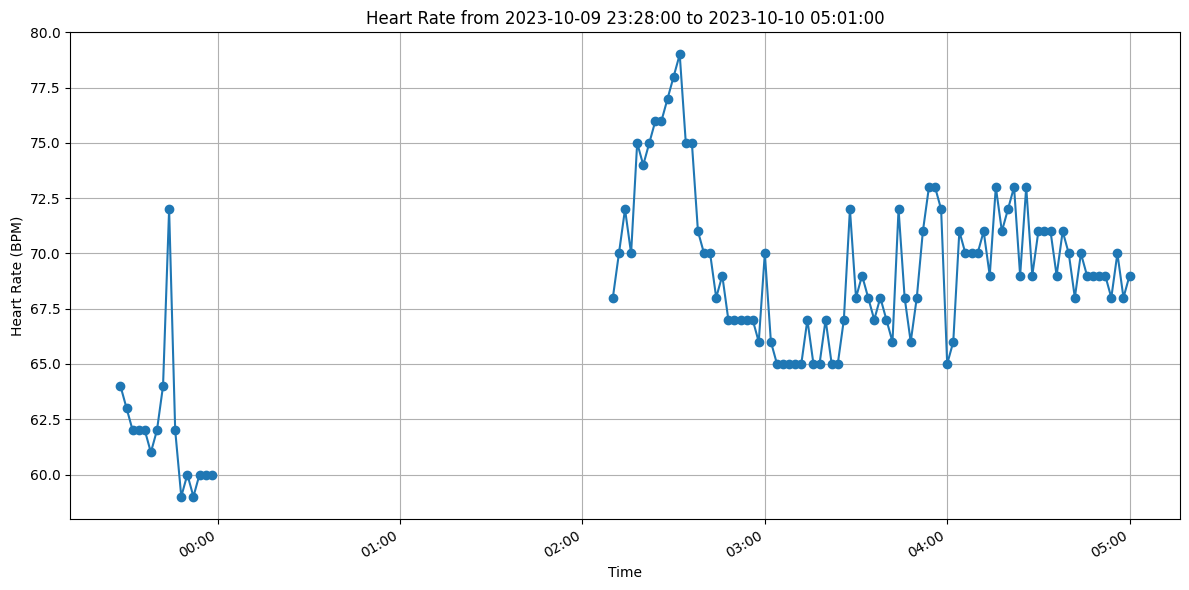

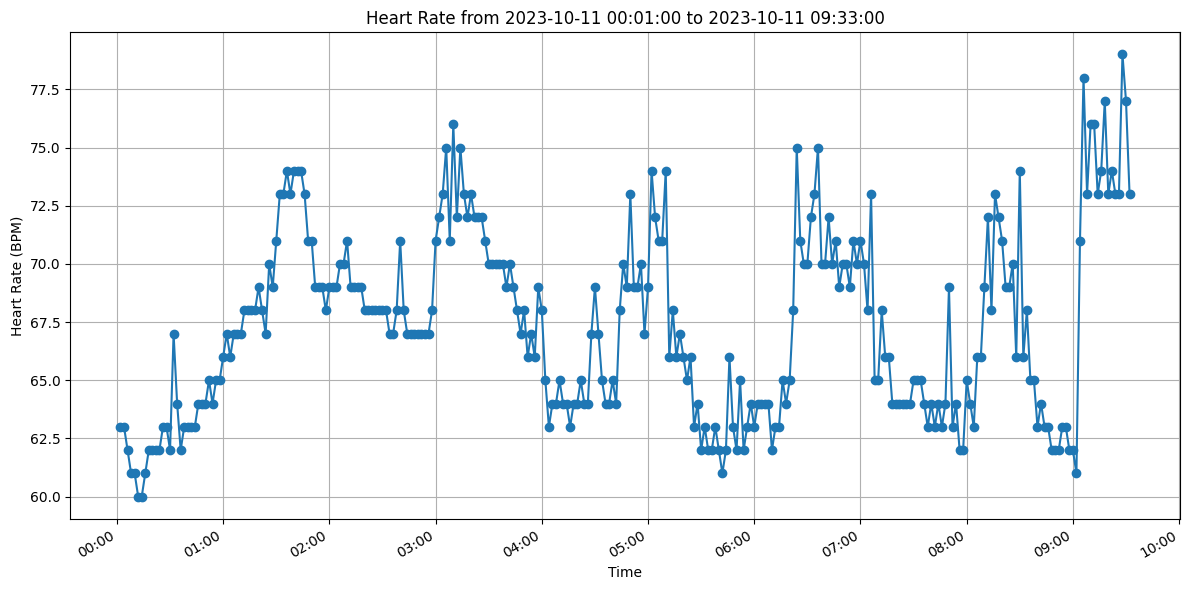

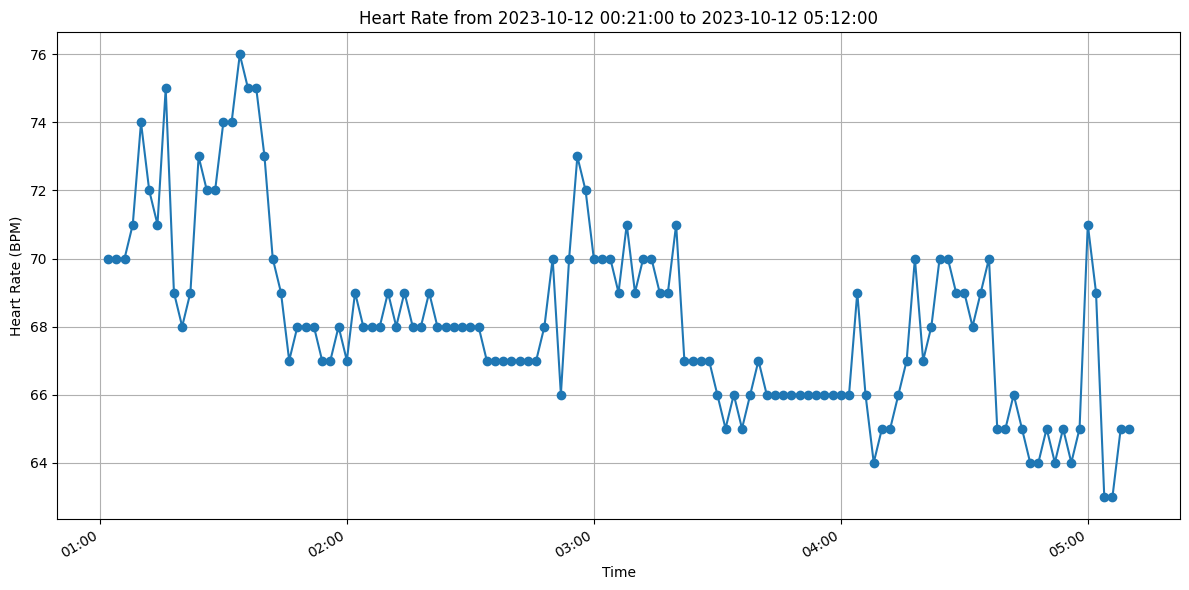

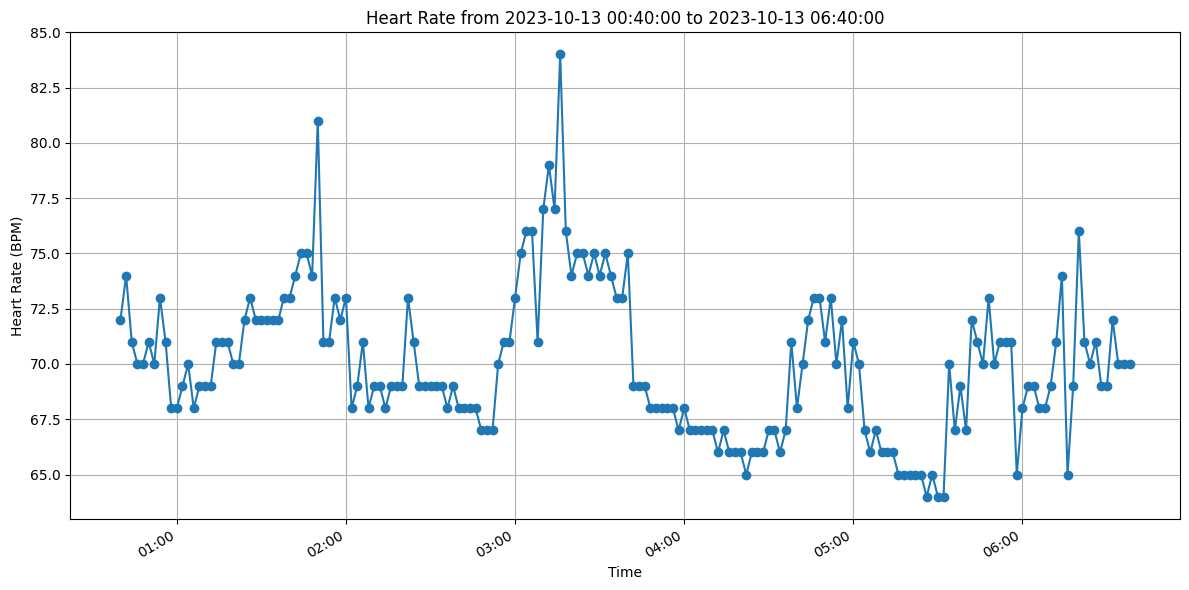

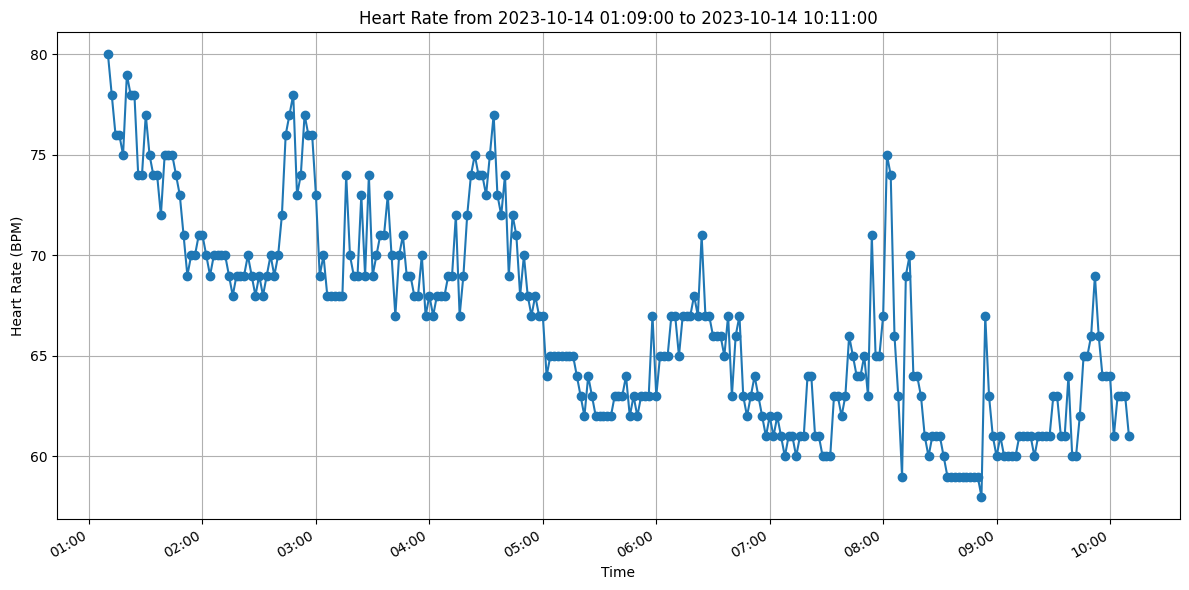

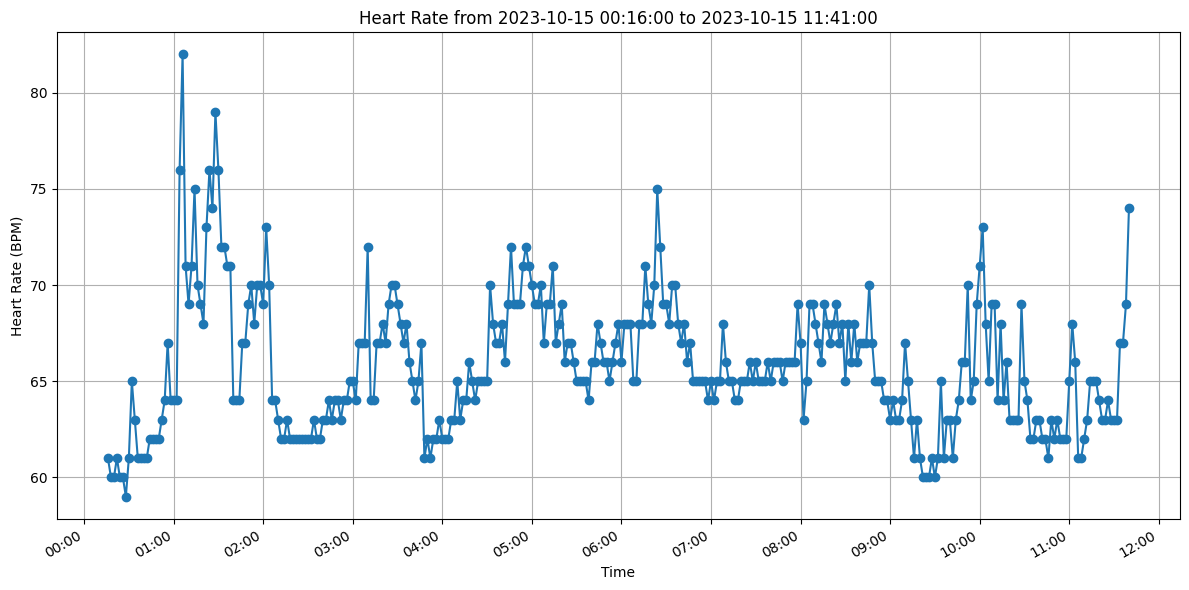

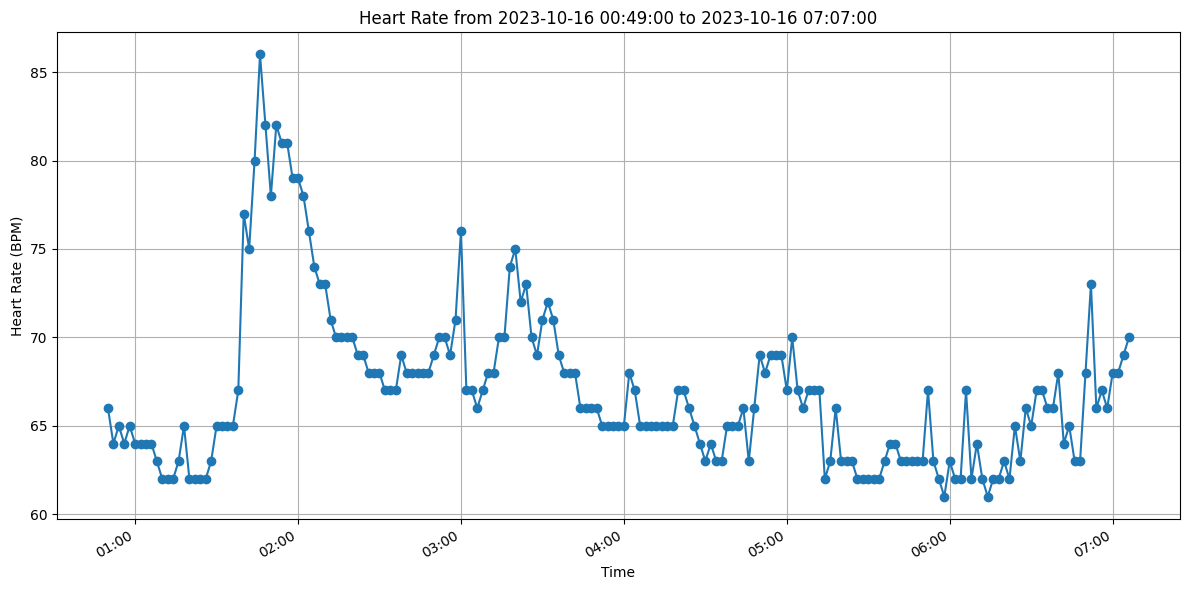

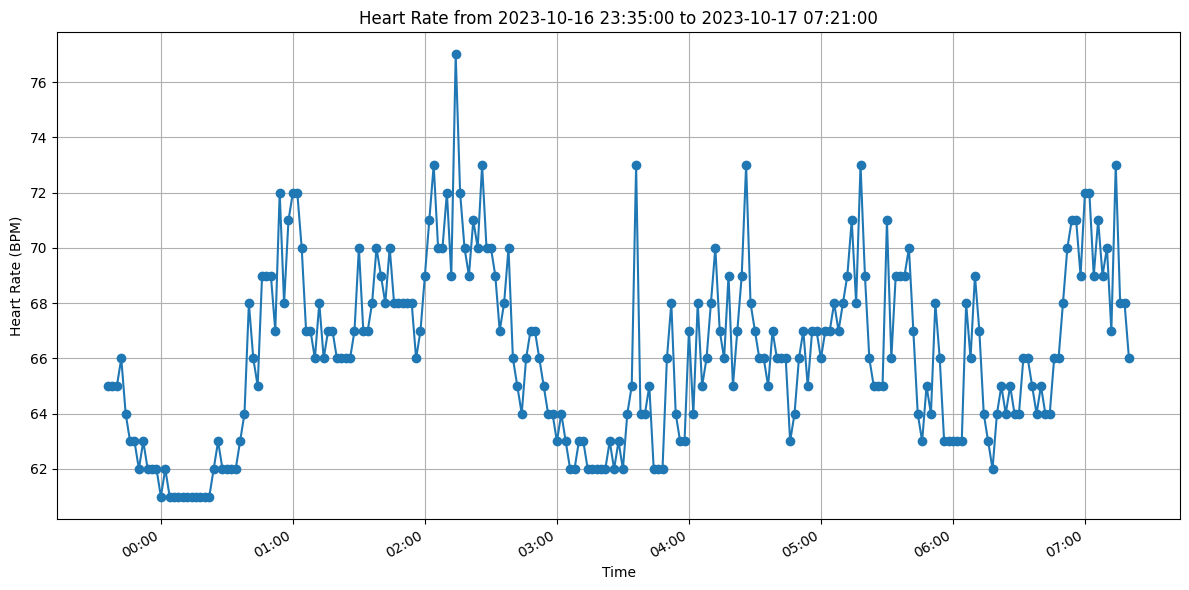

In [20]:
# Loop through each sleep phase
for idx, row in expanded_df.iterrows():
    start_time = row['sleepStartTimestampLocal']
    end_time = row['sleepEndTimestampLocal']

    # If any of the sleep phases is NaN, then continue to next loop iteration
    if pd.isnull(start_time) or pd.isnull(end_time):
        continue

    # Filter the heart rate data for the current sleep phase
    phase_data = final_df[(final_df['startLocal'] >= start_time) & (final_df['startLocal'] <= end_time)]
    
    # If the phase_data is empty, skip plotting
    if phase_data.empty:
        continue

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(phase_data['startLocal'], phase_data['value'], marker='o', linestyle='-')
    
    # Formatting the x-axis for better visualization
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gcf().autofmt_xdate()

    # Setting title and labels
    plt.title(f'Heart Rate from {start_time} to {end_time}')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (BPM)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [21]:
week_sleep_df["sleepLevels"]
sleepLevels = pd.DataFrame.from_dict(week_sleep_df["sleepLevels"])
sleepLevels = [pd.DataFrame(lst) for lst in sleepLevels['sleepLevels'] if lst]

# Concatenate all the DataFrames to form the final DataFrame
sleepLevels_df = pd.concat(sleepLevels, ignore_index=True)

# Optionally, set "value" and "startGMT" as the index
sleepLevels_df

startGMT                 endGMT  activityLevel
0    2023-10-05T21:40:00.0  2023-10-05T21:54:00.0            1.0
1    2023-10-05T21:54:00.0  2023-10-05T22:32:00.0            0.0
2    2023-10-05T22:32:00.0  2023-10-05T22:56:00.0            1.0
3    2023-10-05T22:56:00.0  2023-10-05T23:20:00.0            0.0
4    2023-10-05T23:20:00.0  2023-10-06T00:02:00.0            1.0
..                     ...                    ...            ...
167  2023-10-17T03:02:00.0  2023-10-17T03:44:00.0            2.0
168  2023-10-17T03:44:00.0  2023-10-17T04:10:00.0            1.0
169  2023-10-17T04:10:00.0  2023-10-17T04:12:00.0            3.0
170  2023-10-17T04:12:00.0  2023-10-17T04:43:00.0            1.0
171  2023-10-17T04:43:00.0  2023-10-17T05:21:00.0            2.0

[172 rows x 3 columns]

In [22]:
from datetime import timedelta

# Ensure the startGMT and endGMT columns are in datetime format
sleepLevels_df["startGMT"] = pd.to_datetime(sleepLevels_df["startGMT"])
sleepLevels_df["endGMT"] = pd.to_datetime(sleepLevels_df["endGMT"])

# Convert GMT to local time by adding 2 hours
sleepLevels_df["startLocal"] = sleepLevels_df["startGMT"] + timedelta(hours=2)
sleepLevels_df["endLocal"] = sleepLevels_df["endGMT"] + timedelta(hours=2)

# Display the converted times
sleepLevels_df

startGMT              endGMT  activityLevel  \
0   2023-10-05 21:40:00 2023-10-05 21:54:00            1.0   
1   2023-10-05 21:54:00 2023-10-05 22:32:00            0.0   
2   2023-10-05 22:32:00 2023-10-05 22:56:00            1.0   
3   2023-10-05 22:56:00 2023-10-05 23:20:00            0.0   
4   2023-10-05 23:20:00 2023-10-06 00:02:00            1.0   
..                  ...                 ...            ...   
167 2023-10-17 03:02:00 2023-10-17 03:44:00            2.0   
168 2023-10-17 03:44:00 2023-10-17 04:10:00            1.0   
169 2023-10-17 04:10:00 2023-10-17 04:12:00            3.0   
170 2023-10-17 04:12:00 2023-10-17 04:43:00            1.0   
171 2023-10-17 04:43:00 2023-10-17 05:21:00            2.0   

             startLocal            endLocal  
0   2023-10-05 23:40:00 2023-10-05 23:54:00  
1   2023-10-05 23:54:00 2023-10-06 00:32:00  
2   2023-10-06 00:32:00 2023-10-06 00:56:00  
3   2023-10-06 00:56:00 2023-10-06 01:20:00  
4   2023-10-06 01:20:00 2023-10-06 02:02:00  
..                  ...                 ...  
167 2023-10-17 05:02:00 2023-10-17 05:44:00  
168 2023-10-17 05:44:00 2023-10-17 06:10:00  
169 2023-10-17 06:10:00 2023-10-17 06:12:00  
170 2023-10-17 06:12:00 2023-10-17 06:43:00  
171 2023-10-17 06:43:00 2023-10-17 07:21:00  

[172 rows x 5 columns]

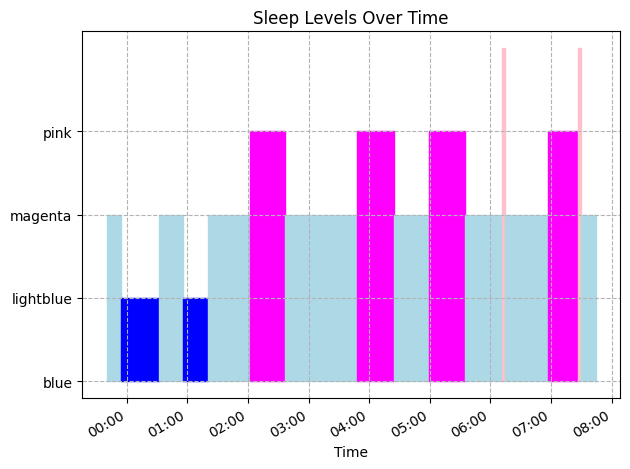

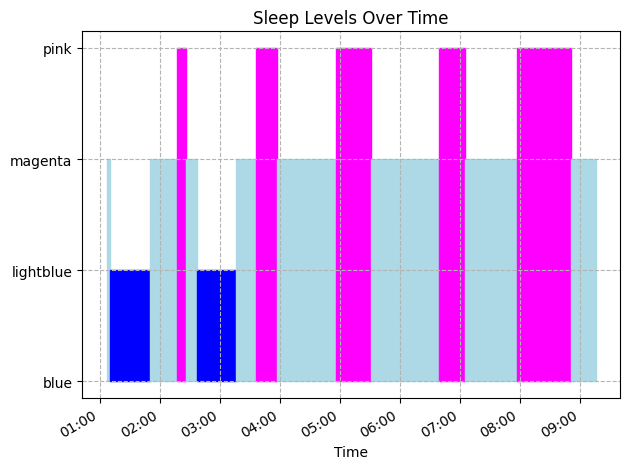

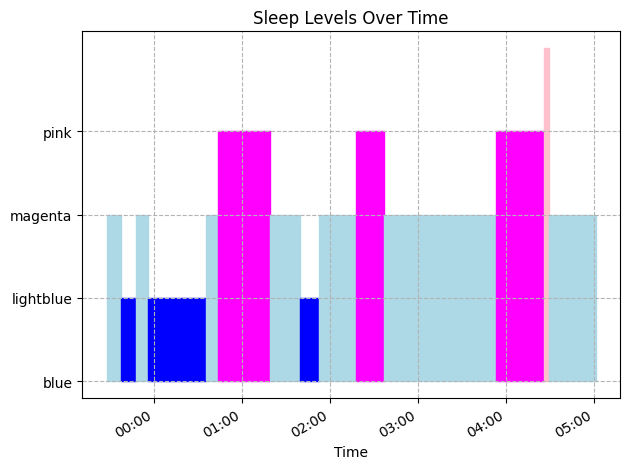

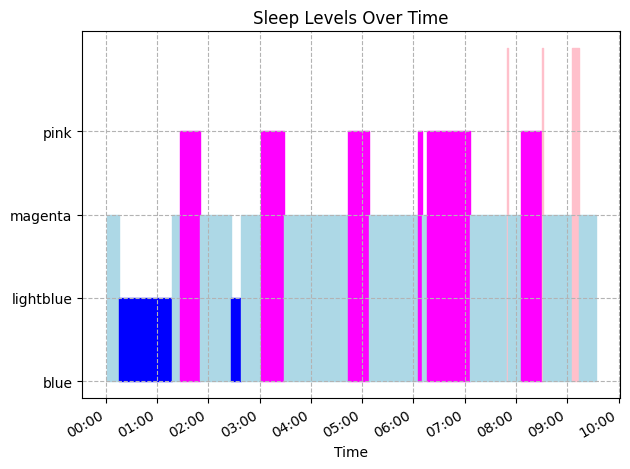

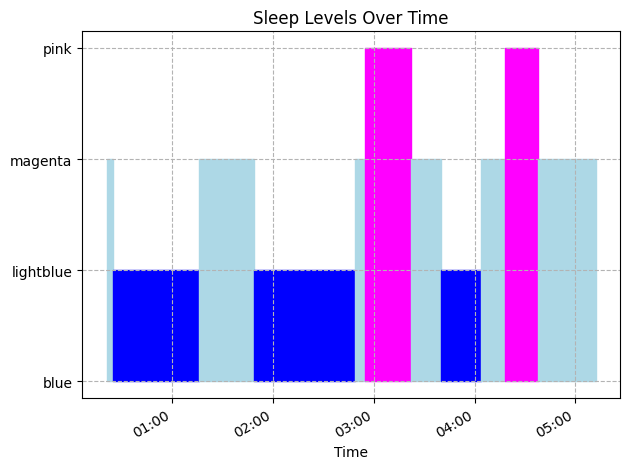

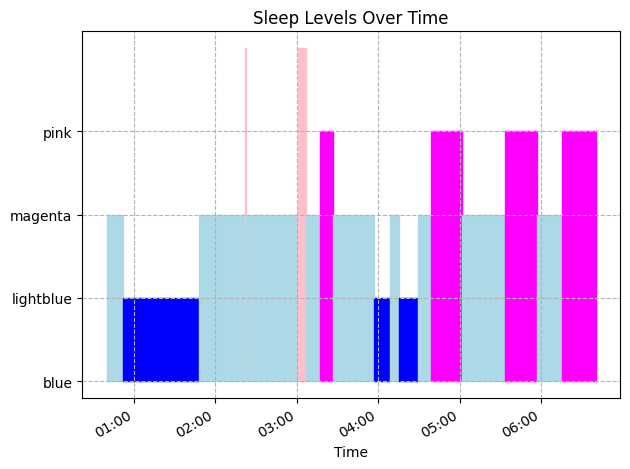

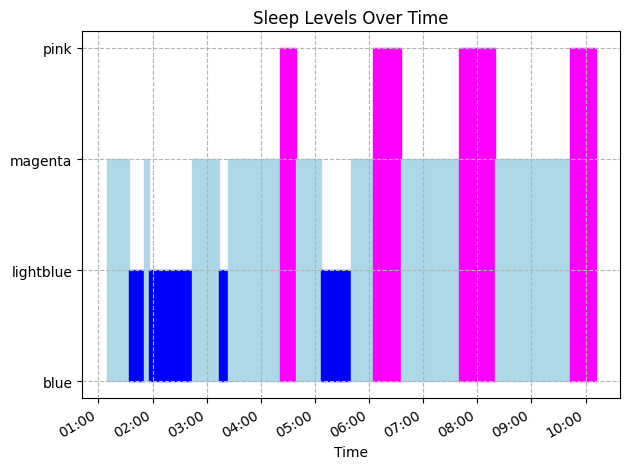

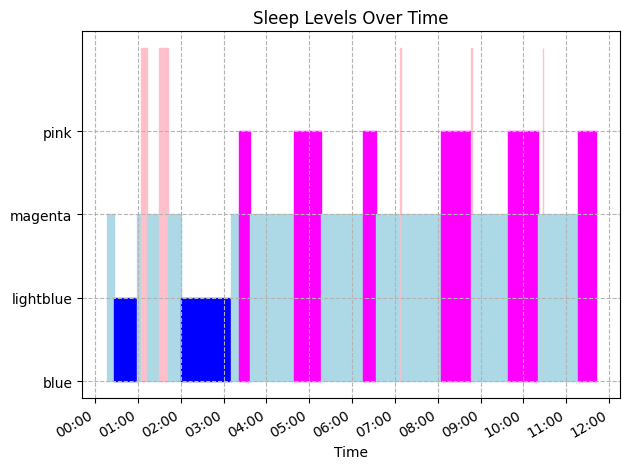

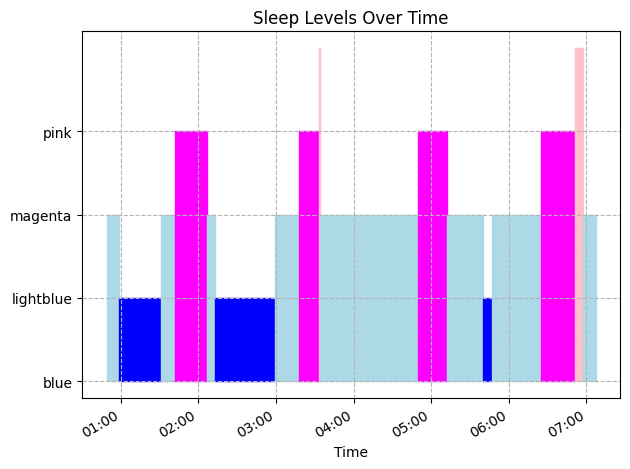

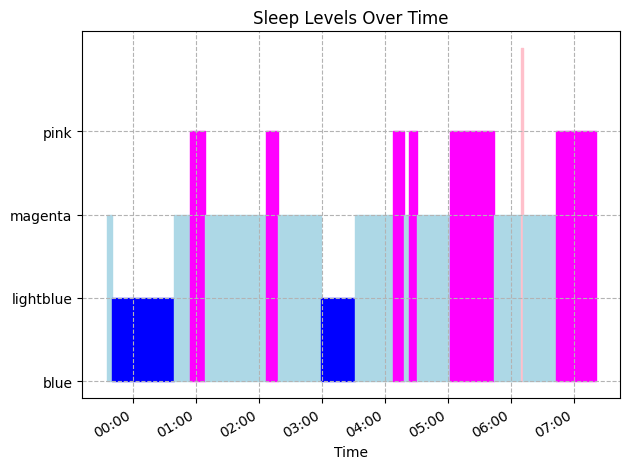

In [23]:
sleep_colors = {
    0.0: 'blue',  # Deep sleep
    1.0: 'lightblue',  # Light sleep
    2.0: 'magenta',  # REM sleep
    3.0: 'pink'  # Awake
}



for idx, row in expanded_df.iterrows():
    start_time = row['sleepStartTimestampLocal']
    end_time = row['sleepEndTimestampLocal']

    # If any of the sleep phases is NaN, then continue to next loop iteration
    if pd.isnull(start_time) or pd.isnull(end_time):
        continue

    # Filter the sleep level data for the current sleep phase
    phase_data = sleepLevels_df[(sleepLevels_df['startLocal'] >= start_time) & (sleepLevels_df['endLocal'] <= end_time)]

    for _, sleep_row in phase_data.iterrows():
        level = sleep_row["activityLevel"]
        plt.fill_between([sleep_row["startLocal"], sleep_row["endLocal"]], 0, level + 1, color=sleep_colors[level])
    
    # Formatting the x-axis for better visualization
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=1))
    plt.gcf().autofmt_xdate()

    # Setting title and labels
    plt.title('Sleep Levels Over Time')
    plt.xlabel('Time')
    plt.yticks(list(sleep_colors.keys()), list(sleep_colors.values()))  # Set y-ticks to show the sleep levels
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    plt.show()


In [24]:
phase_data

startGMT              endGMT  activityLevel  \
154 2023-10-16 21:35:00 2023-10-16 21:40:00            1.0   
155 2023-10-16 21:40:00 2023-10-16 22:39:00            0.0   
156 2023-10-16 22:39:00 2023-10-16 22:55:00            1.0   
157 2023-10-16 22:55:00 2023-10-16 23:09:00            2.0   
158 2023-10-16 23:09:00 2023-10-17 00:07:00            1.0   
159 2023-10-17 00:07:00 2023-10-17 00:18:00            2.0   
160 2023-10-17 00:18:00 2023-10-17 00:59:00            1.0   
161 2023-10-17 00:59:00 2023-10-17 01:32:00            0.0   
162 2023-10-17 01:32:00 2023-10-17 02:08:00            1.0   
163 2023-10-17 02:08:00 2023-10-17 02:18:00            2.0   
164 2023-10-17 02:18:00 2023-10-17 02:23:00            1.0   
165 2023-10-17 02:23:00 2023-10-17 02:31:00            2.0   
166 2023-10-17 02:31:00 2023-10-17 03:02:00            1.0   
167 2023-10-17 03:02:00 2023-10-17 03:44:00            2.0   
168 2023-10-17 03:44:00 2023-10-17 04:10:00            1.0   
169 2023-10-17 04:10:00 2023-10-17 04:12:00            3.0   
170 2023-10-17 04:12:00 2023-10-17 04:43:00            1.0   
171 2023-10-17 04:43:00 2023-10-17 05:21:00            2.0   

             startLocal            endLocal  
154 2023-10-16 23:35:00 2023-10-16 23:40:00  
155 2023-10-16 23:40:00 2023-10-17 00:39:00  
156 2023-10-17 00:39:00 2023-10-17 00:55:00  
157 2023-10-17 00:55:00 2023-10-17 01:09:00  
158 2023-10-17 01:09:00 2023-10-17 02:07:00  
159 2023-10-17 02:07:00 2023-10-17 02:18:00  
160 2023-10-17 02:18:00 2023-10-17 02:59:00  
161 2023-10-17 02:59:00 2023-10-17 03:32:00  
162 2023-10-17 03:32:00 2023-10-17 04:08:00  
163 2023-10-17 04:08:00 2023-10-17 04:18:00  
164 2023-10-17 04:18:00 2023-10-17 04:23:00  
165 2023-10-17 04:23:00 2023-10-17 04:31:00  
166 2023-10-17 04:31:00 2023-10-17 05:02:00  
167 2023-10-17 05:02:00 2023-10-17 05:44:00  
168 2023-10-17 05:44:00 2023-10-17 06:10:00  
169 2023-10-17 06:10:00 2023-10-17 06:12:00  
170 2023-10-17 06:12:00 2023-10-17 06:43:00  
171 2023-10-17 06:43:00 2023-10-17 07:21:00

In [25]:
import json

sleep_dto_df = pd.json_normalize(week_sleep_df['dailySleepDTO'])
sleep_dto_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
0            NaN      116790140   2023-10-03               NaN   
1            NaN      116790140   2023-10-04               NaN   
2            NaN      116790140   2023-10-05               NaN   
3   1.696542e+12      116790140   2023-10-06           28714.0   
4   1.696634e+12      116790140   2023-10-07           29340.0   
5            NaN      116790140   2023-10-08               NaN   
6            NaN      116790140   2023-10-09               NaN   
7   1.696887e+12      116790140   2023-10-10           19800.0   
8   1.696975e+12      116790140   2023-10-11           33660.0   
9   1.697063e+12      116790140   2023-10-12           17460.0   
10  1.697150e+12      116790140   2023-10-13           21180.0   
11  1.697239e+12      116790140   2023-10-14           32520.0   
12  1.697322e+12      116790140   2023-10-15           39600.0   
13  1.697410e+12      116790140   2023-10-16           22260.0   
14  1.697492e+12      116790140   2023-10-17           27840.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
0              NaN                 None                        None   
1              NaN                 None                        None   
2              NaN                 None                        None   
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
5              NaN                 None                        None   
6              NaN                 None                        None   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
0                      NaN                   NaN                       NaN   
1                      NaN                   NaN                       NaN   
2                      NaN                   NaN                       NaN   
3             1.696542e+12          1.696571e+12              1.696549e+12   
4             1.696634e+12          1.696663e+12              1.696641e+12   
5                      NaN                   NaN                       NaN   
6                      NaN                   NaN                       NaN   
7             1.696887e+12          1.696907e+12              1.696894e+12   
8             1.696975e+12          1.697010e+12              1.696982e+12   
9             1.697063e+12          1.697080e+12              1.697070e+12   
10            1.697150e+12          1.697172e+12              1.697158e+12   
11            1.697239e+12          1.697271e+12              1.697246e+12   
12            1.697322e+12          1.697363e+12              1.697329e+12   
13            1.697410e+12          1.697433e+12              1.697417e+12   
14            1.697492e+12          1.697520e+12              1.697499e+12   

    ...  sleepScores.lightPercentage.optimalEnd  \
0   ...                                     NaN   
1   ...                                     NaN   
2   ...                                     NaN   
3   ...                                    64.0   
4   ...                                    64.0   
5   ...                                     NaN   
6   ...                                     NaN   
7   ...                                    64.0   
8   ...                                    64.0   
9   ...                                    64.0   
10  ...   

In [26]:
relevant_columns = ['sleepMovement', 'sleepLevels', 'sleepRestlessMoments', 'wellnessEpochRespirationDataDTOList', 'sleepHeartRate', 'hrvData', 'sleepStress', 'sleepBodyBattery']  # Fügen Sie hier alle relevanten Spaltennamen hinzu

week_sleep_df = week_sleep_df.filter(relevant_columns)

week_sleep_df = week_sleep_df[relevant_columns]

In [27]:
week_sleep_df

sleepMovement  \
0                                                  []   
1                                                  []   
2                                                  []   
3   [{'startGMT': '2023-10-05T20:40:00.0', 'endGMT...   
4   [{'startGMT': '2023-10-06T22:07:00.0', 'endGMT...   
5                                                  []   
6                                                  []   
7   [{'startGMT': '2023-10-09T20:28:00.0', 'endGMT...   
8   [{'startGMT': '2023-10-10T21:01:00.0', 'endGMT...   
9   [{'startGMT': '2023-10-11T21:21:00.0', 'endGMT...   
10  [{'startGMT': '2023-10-12T21:40:00.0', 'endGMT...   
11  [{'startGMT': '2023-10-13T22:09:00.0', 'endGMT...   
12  [{'startGMT': '2023-10-14T21:16:00.0', 'endGMT...   
13  [{'startGMT': '2023-10-15T21:49:00.0', 'endGMT...   
14  [{'startGMT': '2023-10-16T20:35:00.0', 'endGMT...   

                                          sleepLevels  \
0                                                  []   
1                                                  []   
2                                                  []   
3   [{'startGMT': '2023-10-05T21:40:00.0', 'endGMT...   
4   [{'startGMT': '2023-10-06T23:07:00.0', 'endGMT...   
5                                                  []   
6                                                  []   
7   [{'startGMT': '2023-10-09T21:28:00.0', 'endGMT...   
8   [{'startGMT': '2023-10-10T22:01:00.0', 'endGMT...   
9   [{'startGMT': '2023-10-11T22:21:00.0', 'endGMT...   
10  [{'startGMT': '2023-10-12T22:40:00.0', 'endGMT...   
11  [{'startGMT': '2023-10-13T23:09:00.0', 'endGMT...   
12  [{'startGMT': '2023-10-14T22:16:00.0', 'endGMT...   
13  [{'startGMT': '2023-10-15T22:49:00.0', 'endGMT...   
14  [{'startGMT': '2023-10-16T21:35:00.0', 'endGMT...   

                                 sleepRestlessMoments  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3   [{'value': 1, 'startGMT': 1696542180000}, {'va...   
4   [{'value': 1, 'startGMT': 1696633620000}, {'va...   
5                                                 NaN   
6                                                 NaN   
7   [{'value': 1, 'startGMT': 1696887600000}, {'va...   
8   [{'value': 1, 'startGMT': 1696977060000}, {'va...   
9   [{'value': 1, 'startGMT': 1697065920000}, {'va...   
10  [{'value': 1, 'startGMT': 1697154540000}, {'va...   
11  [{'value': 2, 'startGMT': 1697239080000}, {'va...   
12  [{'value': 1, 'startGMT': 1697322480000}, {'va...   
13  [{'value': 1, 'startGMT': 1697413020000}, {'va...   
14  [{'value': 1, 'startGMT': 1697495880000}, {'va...   

                  wellnessEpochRespirationDataDTOList  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3   [{'startTimeGMT': 1696542000000, 'respirationV...   
4   [{'startTimeGMT': 1696633620000, 'respirationV...   
5                                                 NaN   
6                                                 NaN   
7   [{'startTimeGMT': 1696886880000, 'respirationV...   
8   [{'startTimeGMT': 1696975260000, 'respirationV...   
9   [{'startTimeGMT': 1697065320000, 'respirationV...   
10  [{'startTimeGMT': 1697150400000, 'respirationV...   
11  [{'startTimeGMT': 1697238540000, 'respirationV...   
12  [{'startTimeGMT': 1697321760000, 'respirationV...   
13  [{'startTimeGMT': 1697410140000, 'respirationV...   
14  [{'startTimeGMT': 1697492100000, 'respirationV...   

                                       sleepHeartRate  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3   [{'value': 72, 'startGMT': 1696542000000}, {'v...   
4   [{'value': 62, 'startGMT': 1696633560000}, {'v...   
5                                             

In [28]:

extracted_dfs = []
for col in week_sleep_df.columns:
    # Überprüfen, ob die Spalte Listen von Dictionaries enthält
    if isinstance(week_sleep_df[col].dropna().iloc[0], list):
        col_data = week_sleep_df[col].dropna()
        dfs = [pd.DataFrame(data_list) for data_list in col_data if data_list]
        col_df = pd.concat(dfs, ignore_index=True)
        extracted_dfs.append(col_df)


In [29]:
extracted_dfs

[                   startGMT                 endGMT  activityLevel
 0     2023-10-05T20:40:00.0  2023-10-05T20:41:00.0       7.738700
 1     2023-10-05T20:41:00.0  2023-10-05T20:42:00.0       7.674190
 2     2023-10-05T20:42:00.0  2023-10-05T20:43:00.0       7.610911
 3     2023-10-05T20:43:00.0  2023-10-05T20:44:00.0       7.552254
 4     2023-10-05T20:44:00.0  2023-10-05T20:45:00.0       7.501824
 ...                     ...                    ...            ...
 5602  2023-10-17T06:16:00.0  2023-10-17T06:17:00.0       3.500648
 5603  2023-10-17T06:17:00.0  2023-10-17T06:18:00.0       4.029838
 5604  2023-10-17T06:18:00.0  2023-10-17T06:19:00.0       4.553140
 5605  2023-10-17T06:19:00.0  2023-10-17T06:20:00.0       5.060903
 5606  2023-10-17T06:20:00.0  2023-10-17T06:21:00.0       5.544125
 
 [5607 rows x 3 columns],
                   startGMT                 endGMT  activityLevel
 0    2023-10-05T21:40:00.0  2023-10-05T21:54:00.0            1.0
 1    2023-10-05T21:54:00.0  2023-10

In [30]:
combined_extracted_df = pd.concat(extracted_dfs, axis=0, ignore_index=True)

In [31]:
combined_extracted_df

startGMT                 endGMT  activityLevel  value  \
0      2023-10-05T20:40:00.0  2023-10-05T20:41:00.0       7.738700    NaN   
1      2023-10-05T20:41:00.0  2023-10-05T20:42:00.0       7.674190    NaN   
2      2023-10-05T20:42:00.0  2023-10-05T20:43:00.0       7.610911    NaN   
3      2023-10-05T20:43:00.0  2023-10-05T20:44:00.0       7.552254    NaN   
4      2023-10-05T20:44:00.0  2023-10-05T20:45:00.0       7.501824    NaN   
...                      ...                    ...            ...    ...   
14328          1697519160000                    NaN            NaN   98.0   
14329          1697519340000                    NaN            NaN   98.0   
14330          1697519520000                    NaN            NaN   98.0   
14331          1697519700000                    NaN            NaN   98.0   
14332          1697519880000                    NaN            NaN   98.0   

       startTimeGMT  respirationValue  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  
...             ...               ...  
14328           NaN               NaN  
14329           NaN               NaN  
14330           NaN               NaN  
14331           NaN               NaN  
14332           NaN               NaN  

[14333 rows x 6 columns]

In [32]:
combined_extracted_df["respirationValue"].isnull().value_counts()

respirationValue
True     12109
False     2224
Name: count, dtype: int64

In [33]:
for col in week_sleep_df.columns:
    if isinstance(week_sleep_df[col].dropna().iloc[0], list):
        col_data = week_sleep_df[col].dropna()
        for data_list in col_data:
            if data_list:
                temp_df = pd.DataFrame(data_list)
                
                # Hinzufügen der Spaltenquelle für Klarheit
                temp_df['Source'] = col

                # Vereinheitlichen der Zeitstempel
                if 'startGMT' in temp_df.columns:
                    temp_df['Timestamp'] = pd.to_datetime(temp_df['startGMT'])
                elif 'startTimeGMT' in temp_df.columns:
                    temp_df['Timestamp'] = pd.to_datetime(temp_df['startTimeGMT'], unit='ms')

                # Optional: Entfernen der ursprünglichen Zeitstempelspalten
                temp_df.drop(['startGMT', 'endGMT', 'startTimeGMT'], axis=1, inplace=True, errors='ignore')

                extracted_dfs.append(temp_df)

# Kombinieren der bearbeiteten DataFrames
combined_extracted_df = pd.concat(extracted_dfs, ignore_index=True)

In [34]:
combined_extracted_df

startGMT                 endGMT  activityLevel  value  \
0      2023-10-05T20:40:00.0  2023-10-05T20:41:00.0       7.738700    NaN   
1      2023-10-05T20:41:00.0  2023-10-05T20:42:00.0       7.674190    NaN   
2      2023-10-05T20:42:00.0  2023-10-05T20:43:00.0       7.610911    NaN   
3      2023-10-05T20:43:00.0  2023-10-05T20:44:00.0       7.552254    NaN   
4      2023-10-05T20:44:00.0  2023-10-05T20:45:00.0       7.501824    NaN   
...                      ...                    ...            ...    ...   
28661                    NaN                    NaN            NaN   98.0   
28662                    NaN                    NaN            NaN   98.0   
28663                    NaN                    NaN            NaN   98.0   
28664                    NaN                    NaN            NaN   98.0   
28665                    NaN                    NaN            NaN   98.0   

       startTimeGMT  respirationValue            Source  \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4               NaN               NaN               NaN   
...             ...               ...               ...   
28661           NaN               NaN  sleepBodyBattery   
28662           NaN               NaN  sleepBodyBattery   
28663           NaN               NaN  sleepBodyBattery   
28664           NaN               NaN  sleepBodyBattery   
28665           NaN               NaN  sleepBodyBattery   

                       Timestamp  
0                            NaT  
1                            NaT  
2                            NaT  
3                            NaT  
4                            NaT  
...                          ...  
28661 1970-01-01 00:28:17.519160  
28662 1970-01-01 00:28:17.519340  
28663 1970-01-01 00:28:17.519520  
28664 1970-01-01 00:28:17.519700  
28665 1970-01-01 00:28:17.519880  

[28666 rows x 8 columns]

In [35]:
combined_extracted_df["respirationValue"].isnull().value_counts()

respirationValue
True     24218
False     4448
Name: count, dtype: int64

In [36]:
extracted_dfs = []

for col in week_sleep_df.columns:
    col_data = week_sleep_df[col].dropna()
    for data_list in col_data:
        if data_list:
            temp_df = pd.DataFrame(data_list)
            
            # Hinzufügen der Quellenspalte
            temp_df['Source'] = col

            # Vereinheitlichen und Setzen der Zeitstempel als Index
            if 'startGMT' in temp_df.columns:
                temp_df['Timestamp'] = pd.to_datetime(temp_df['startGMT'])
                temp_df.set_index('Timestamp', inplace=True)
            elif 'startTimeGMT' in temp_df.columns:
                temp_df['Timestamp'] = pd.to_datetime(temp_df['startTimeGMT'], unit='ms')
                temp_df.set_index('Timestamp', inplace=True)

            # Entfernen unnötiger Spalten
            temp_df.drop(['startGMT', 'endGMT', 'startTimeGMT'], axis=1, inplace=True, errors='ignore')
            extracted_dfs.append(temp_df)

# Kombinieren der DataFrames
combined_extracted_df = pd.concat(extracted_dfs)


In [37]:
combined_extracted_df

activityLevel            Source  value  \
Timestamp                                                            
2023-10-05 20:40:00.000000       7.738700     sleepMovement    NaN   
2023-10-05 20:41:00.000000       7.674190     sleepMovement    NaN   
2023-10-05 20:42:00.000000       7.610911     sleepMovement    NaN   
2023-10-05 20:43:00.000000       7.552254     sleepMovement    NaN   
2023-10-05 20:44:00.000000       7.501824     sleepMovement    NaN   
...                                   ...               ...    ...   
1970-01-01 00:28:17.519160            NaN  sleepBodyBattery   98.0   
1970-01-01 00:28:17.519340            NaN  sleepBodyBattery   98.0   
1970-01-01 00:28:17.519520            NaN  sleepBodyBattery   98.0   
1970-01-01 00:28:17.519700            NaN  sleepBodyBattery   98.0   
1970-01-01 00:28:17.519880            NaN  sleepBodyBattery   98.0   

                            respirationValue  
Timestamp                                     
2023-10-05 20:40:00.000000               NaN  
2023-10-05 20:41:00.000000               NaN  
2023-10-05 20:42:00.000000               NaN  
2023-10-05 20:43:00.000000               NaN  
2023-10-05 20:44:00.000000               NaN  
...                                      ...  
1970-01-01 00:28:17.519160               NaN  
1970-01-01 00:28:17.519340               NaN  
1970-01-01 00:28:17.519520               NaN  
1970-01-01 00:28:17.519700               NaN  
1970-01-01 00:28:17.519880               NaN  

[14333 rows x 4 columns]

In [39]:
sleep_dto_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
0            NaN      116790140   2023-10-03               NaN   
1            NaN      116790140   2023-10-04               NaN   
2            NaN      116790140   2023-10-05               NaN   
3   1.696542e+12      116790140   2023-10-06           28714.0   
4   1.696634e+12      116790140   2023-10-07           29340.0   
5            NaN      116790140   2023-10-08               NaN   
6            NaN      116790140   2023-10-09               NaN   
7   1.696887e+12      116790140   2023-10-10           19800.0   
8   1.696975e+12      116790140   2023-10-11           33660.0   
9   1.697063e+12      116790140   2023-10-12           17460.0   
10  1.697150e+12      116790140   2023-10-13           21180.0   
11  1.697239e+12      116790140   2023-10-14           32520.0   
12  1.697322e+12      116790140   2023-10-15           39600.0   
13  1.697410e+12      116790140   2023-10-16           22260.0   
14  1.697492e+12      116790140   2023-10-17           27840.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
0              NaN                 None                        None   
1              NaN                 None                        None   
2              NaN                 None                        None   
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
5              NaN                 None                        None   
6              NaN                 None                        None   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
0                      NaN                   NaN                       NaN   
1                      NaN                   NaN                       NaN   
2                      NaN                   NaN                       NaN   
3             1.696542e+12          1.696571e+12              1.696549e+12   
4             1.696634e+12          1.696663e+12              1.696641e+12   
5                      NaN                   NaN                       NaN   
6                      NaN                   NaN                       NaN   
7             1.696887e+12          1.696907e+12              1.696894e+12   
8             1.696975e+12          1.697010e+12              1.696982e+12   
9             1.697063e+12          1.697080e+12              1.697070e+12   
10            1.697150e+12          1.697172e+12              1.697158e+12   
11            1.697239e+12          1.697271e+12              1.697246e+12   
12            1.697322e+12          1.697363e+12              1.697329e+12   
13            1.697410e+12          1.697433e+12              1.697417e+12   
14            1.697492e+12          1.697520e+12              1.697499e+12   

    ...  sleepScores.lightPercentage.optimalEnd  \
0   ...                                     NaN   
1   ...                                     NaN   
2   ...                                     NaN   
3   ...                                    64.0   
4   ...                                    64.0   
5   ...                                     NaN   
6   ...                                     NaN   
7   ...                                    64.0   
8   ...                                    64.0   
9   ...                                    64.0   
10  ...   

In [46]:
sleep_dto_df = sleep_dto_df.dropna(subset=["id"])
sleep_dto_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
3   1.696542e+12      116790140   2023-10-06           28714.0   
4   1.696634e+12      116790140   2023-10-07           29340.0   
7   1.696887e+12      116790140   2023-10-10           19800.0   
8   1.696975e+12      116790140   2023-10-11           33660.0   
9   1.697063e+12      116790140   2023-10-12           17460.0   
10  1.697150e+12      116790140   2023-10-13           21180.0   
11  1.697239e+12      116790140   2023-10-14           32520.0   
12  1.697322e+12      116790140   2023-10-15           39600.0   
13  1.697410e+12      116790140   2023-10-16           22260.0   
14  1.697492e+12      116790140   2023-10-17           27840.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
3             1.696542e+12          1.696571e+12              1.696549e+12   
4             1.696634e+12          1.696663e+12              1.696641e+12   
7             1.696887e+12          1.696907e+12              1.696894e+12   
8             1.696975e+12          1.697010e+12              1.696982e+12   
9             1.697063e+12          1.697080e+12              1.697070e+12   
10            1.697150e+12          1.697172e+12              1.697158e+12   
11            1.697239e+12          1.697271e+12              1.697246e+12   
12            1.697322e+12          1.697363e+12              1.697329e+12   
13            1.697410e+12          1.697433e+12              1.697417e+12   
14            1.697492e+12          1.697520e+12              1.697499e+12   

    ...  sleepScores.lightPercentage.optimalEnd  \
3   ...                                    64.0   
4   ...                                    64.0   
7   ...                                    64.0   
8   ...                                    64.0   
9   ...                                    64.0   
10  ...                                    64.0   
11  ...                                    64.0   
12  ...                                    64.0   
13  ...                                    64.0   
14  ...                                    64.0   

   sleepScores.lightPercentage.idealStartInSeconds  \
3                                           8614.2   
4                                           8802.0   
7                                           5940.0   
8                                          10098.0   
9                                           5238.0   
10                                          6354.0   
11                                          9756.0   
12                                         11880.0   
13                                          6678.0   
14                                          8352.0   

   sleepScores.lightPercentage.idealEndInSeconds  \
3                                       18376.96   
4                                       18777.60   
7                                       12672.00   
8                                       21542.40   
9                                       11174.40   
10                                      13555.20   
11                                      20812.80   
12                                      25344.00   
13                   

In [50]:
delete_cols = ["napTimeSeconds", "sleepWindowConfirmed", "sleepWindowConfirmationType", "autoSleepStartTimestampGMT",
                  "autoSleepEndTimestampGMT", "sleepQualityTypePK", ]

In [51]:
sleep_dto_df.drop(delete_cols, axis=1) 

id  userProfilePK calendarDate  sleepTimeSeconds  \
3   1.696542e+12      116790140   2023-10-06           28714.0   
4   1.696634e+12      116790140   2023-10-07           29340.0   
7   1.696887e+12      116790140   2023-10-10           19800.0   
8   1.696975e+12      116790140   2023-10-11           33660.0   
9   1.697063e+12      116790140   2023-10-12           17460.0   
10  1.697150e+12      116790140   2023-10-13           21180.0   
11  1.697239e+12      116790140   2023-10-14           32520.0   
12  1.697322e+12      116790140   2023-10-15           39600.0   
13  1.697410e+12      116790140   2023-10-16           22260.0   
14  1.697492e+12      116790140   2023-10-17           27840.0   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
3             1.696542e+12          1.696571e+12              1.696549e+12   
4             1.696634e+12          1.696663e+12              1.696641e+12   
7             1.696887e+12          1.696907e+12              1.696894e+12   
8             1.696975e+12          1.697010e+12              1.696982e+12   
9             1.697063e+12          1.697080e+12              1.697070e+12   
10            1.697150e+12          1.697172e+12              1.697158e+12   
11            1.697239e+12          1.697271e+12              1.697246e+12   
12            1.697322e+12          1.697363e+12              1.697329e+12   
13            1.697410e+12          1.697433e+12              1.697417e+12   
14            1.697492e+12          1.697520e+12              1.697499e+12   

    sleepEndTimestampLocal autoSleepEndTimestampGMT sleepQualityTypePK  ...  \
3             1.696578e+12                     None               None  ...   
4             1.696670e+12                     None               None  ...   
7             1.696914e+12                     None               None  ...   
8             1.697017e+12                     None               None  ...   
9             1.697088e+12                     None               None  ...   
10            1.697179e+12                     None               None  ...   
11            1.697278e+12                     None               None  ...   
12            1.697370e+12                     None               None  ...   
13            1.697440e+12                     None               None  ...   
14            1.697527e+12                     None               None  ...   

   sleepScores.lightPercentage.optimalEnd  \
3                                    64.0   
4                                    64.0   
7                                    64.0   
8                                    64.0   
9                                    64.0   
10                                   64.0   
11                                   64.0   
12                                   64.0   
13                                   64.0   
14                                   64.0   

    sleepScores.lightPercentage.idealStartInSeconds  \
3                                            8614.2   
4                                            8802.0   
7                                            5940.0   
8                                           10098.0   
9                                            5238.0   
10                                           6354.0   
11                                           9756.0   
12                                          11880.0   
13                                           6678.0   
14                                           8352.0   

    sleepScores.lightPercentage.idealEndInSeconds  \
3                                        18376.96   
4                                        18777.60   
7                                        12672.00   
8                                        21542.40   
9                                        11174.40   
10                                       13555.20   
11                                       20812.80   
12                              